In [1]:
%run function_and_library.ipynb

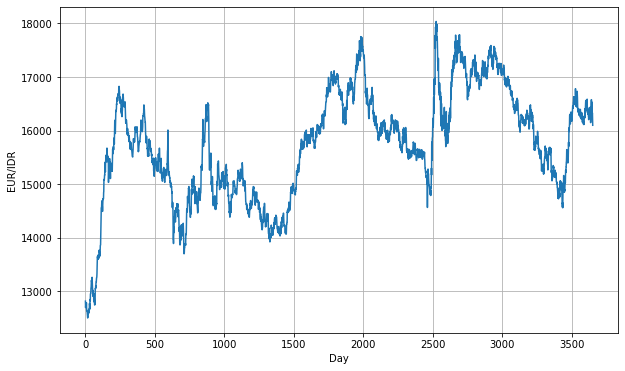

In [2]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./currency_data_10_years.csv') as csvfile:
  
    # Initialize reader
    reader = csv.reader(csvfile, delimiter=',')

    # Skip the first line
    next(reader)

    # Append row and sunspot number to lists
    for i,row in enumerate(reader):
        time_step.append(int(i))
        sunspots.append(float(row[1]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Day', ylabel='EUR/IDR')

In [3]:
split_time = 3000

x_train = series[:split_time]
time_train = time[:split_time]

x_valid = series[split_time:]
time_valid = time[split_time:]

window_size = 30
batch_size = 128
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

In [4]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(30, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_1")

# Get initial weights
init_weights = model_1.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_1.set_weights(init_weights)

model_1.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_1.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_1 = model_1.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_1.name)])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                930       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     21/Unknown - 2s 17ms/step - loss: 2339.2300 - mae: 2339.7300

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 5s 174ms/step - loss: 2155.1233 - mae: 2155.6233 - val_loss: 319.1934 - val_mae: 319.6934
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 424.3635 - mae: 424.8635

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 52ms/step - loss: 370.1700 - mae: 370.6699 - val_loss: 283.5194 - val_mae: 284.0194
Epoch 3/100
15/24 [=================>............] - ETA: 0s - loss: 257.3527 - mae: 257.8527

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 244.6393 - mae: 245.1389 - val_loss: 179.8297 - val_mae: 180.3277
Epoch 4/100
14/24 [================>.............] - ETA: 0s - loss: 233.3179 - mae: 233.8174

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 53ms/step - loss: 229.2577 - mae: 229.7569 - val_loss: 179.2617 - val_mae: 179.7605
Epoch 5/100
14/24 [================>.............] - ETA: 0s - loss: 232.7522 - mae: 233.2521

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 59ms/step - loss: 230.1001 - mae: 230.5997 - val_loss: 165.0099 - val_mae: 165.5093
Epoch 6/100
24/24 [==============================] - 1s 19ms/step - loss: 222.0050 - mae: 222.5047 - val_loss: 168.2455 - val_mae: 168.7443
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 222.6191 - mae: 223.1189

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 220.5502 - mae: 221.0497 - val_loss: 162.6745 - val_mae: 163.1744
Epoch 8/100
24/24 [==============================] - 1s 19ms/step - loss: 221.3896 - mae: 221.8892 - val_loss: 186.1330 - val_mae: 186.6321
Epoch 9/100
24/24 [==============================] - 1s 19ms/step - loss: 218.1643 - mae: 218.6635 - val_loss: 169.9217 - val_mae: 170.4207
Epoch 10/100
24/24 [==============================] - 1s 19ms/step - loss: 219.7977 - mae: 220.2965 - val_loss: 164.7446 - val_mae: 165.2429
Epoch 11/100
15/24 [=================>............] - ETA: 0s - loss: 216.1112 - mae: 216.6108

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 215.4723 - mae: 215.9718 - val_loss: 161.6542 - val_mae: 162.1535
Epoch 12/100
24/24 [==============================] - 1s 20ms/step - loss: 216.2641 - mae: 216.7635 - val_loss: 170.5998 - val_mae: 171.0989
Epoch 13/100
24/24 [==============================] - 1s 20ms/step - loss: 214.1062 - mae: 214.6055 - val_loss: 169.5186 - val_mae: 170.0178
Epoch 14/100
24/24 [==============================] - 1s 19ms/step - loss: 214.8648 - mae: 215.3639 - val_loss: 169.3513 - val_mae: 169.8511
Epoch 15/100
15/24 [=================>............] - ETA: 0s - loss: 221.4480 - mae: 221.9474

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 214.8168 - mae: 215.3161 - val_loss: 159.3790 - val_mae: 159.8787
Epoch 16/100
24/24 [==============================] - 1s 19ms/step - loss: 212.9168 - mae: 213.4165 - val_loss: 178.3223 - val_mae: 178.8221
Epoch 17/100
16/24 [===================>..........] - ETA: 0s - loss: 218.0982 - mae: 218.5975

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 214.0714 - mae: 214.5707 - val_loss: 153.3693 - val_mae: 153.8680
Epoch 18/100
24/24 [==============================] - 1s 18ms/step - loss: 212.5602 - mae: 213.0597 - val_loss: 200.0074 - val_mae: 200.5067
Epoch 19/100
15/24 [=================>............] - ETA: 0s - loss: 208.7698 - mae: 209.2690

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 209.5559 - mae: 210.0553 - val_loss: 151.6764 - val_mae: 152.1764
Epoch 20/100
14/24 [================>.............] - ETA: 0s - loss: 206.6814 - mae: 207.1811

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 56ms/step - loss: 205.5521 - mae: 206.0516 - val_loss: 150.5095 - val_mae: 151.0084
Epoch 21/100
24/24 [==============================] - 1s 18ms/step - loss: 209.4222 - mae: 209.9219 - val_loss: 202.2513 - val_mae: 202.7513
Epoch 22/100
24/24 [==============================] - 1s 19ms/step - loss: 204.3823 - mae: 204.8813 - val_loss: 151.3310 - val_mae: 151.8307
Epoch 23/100
16/24 [===================>..........] - ETA: 0s - loss: 206.3347 - mae: 206.8339

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 203.8092 - mae: 204.3086 - val_loss: 147.9119 - val_mae: 148.4113
Epoch 24/100
17/24 [====================>.........] - ETA: 0s - loss: 199.9221 - mae: 200.4216

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 57ms/step - loss: 199.2226 - mae: 199.7221 - val_loss: 147.5867 - val_mae: 148.0863
Epoch 25/100
18/24 [=====================>........] - ETA: 0s - loss: 202.8654 - mae: 203.3650

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 201.1592 - mae: 201.6589 - val_loss: 146.0192 - val_mae: 146.5186
Epoch 26/100
24/24 [==============================] - 1s 20ms/step - loss: 198.3424 - mae: 198.8420 - val_loss: 147.8631 - val_mae: 148.3627
Epoch 27/100
24/24 [==============================] - 1s 18ms/step - loss: 200.1986 - mae: 200.6979 - val_loss: 161.7847 - val_mae: 162.2843
Epoch 28/100
24/24 [==============================] - 1s 19ms/step - loss: 201.6406 - mae: 202.1402 - val_loss: 169.6279 - val_mae: 170.1272
Epoch 29/100
24/24 [==============================] - 1s 18ms/step - loss: 191.9508 - mae: 192.4497 - val_loss: 148.1063 - val_mae: 148.6054
Epoch 30/100
15/24 [=================>............] - ETA: 0s - loss: 194.9062 - mae: 195.4056

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 49ms/step - loss: 193.6063 - mae: 194.1057 - val_loss: 142.1881 - val_mae: 142.6877
Epoch 31/100
24/24 [==============================] - 1s 18ms/step - loss: 209.1352 - mae: 209.6344 - val_loss: 168.3031 - val_mae: 168.8027
Epoch 32/100
24/24 [==============================] - 1s 19ms/step - loss: 189.4901 - mae: 189.9892 - val_loss: 153.0282 - val_mae: 153.5273
Epoch 33/100
15/24 [=================>............] - ETA: 0s - loss: 196.4200 - mae: 196.9193

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 194.1904 - mae: 194.6896 - val_loss: 136.9729 - val_mae: 137.4729
Epoch 34/100
24/24 [==============================] - 1s 19ms/step - loss: 191.2084 - mae: 191.7081 - val_loss: 142.2382 - val_mae: 142.7360
Epoch 35/100
24/24 [==============================] - 1s 19ms/step - loss: 194.0633 - mae: 194.5623 - val_loss: 231.2021 - val_mae: 231.7021
Epoch 36/100
24/24 [==============================] - 1s 18ms/step - loss: 192.4294 - mae: 192.9289 - val_loss: 157.3018 - val_mae: 157.8008
Epoch 37/100
24/24 [==============================] - 1s 18ms/step - loss: 183.0658 - mae: 183.5649 - val_loss: 153.6640 - val_mae: 154.1635
Epoch 38/100
24/24 [==============================] - 1s 18ms/step - loss: 198.3291 - mae: 198.8287 - val_loss: 147.7414 - val_mae: 148.2406
Epoch 39/100
18/24 [=====================>........] - ETA: 0s - loss: 179.3234 - mae: 179.8227

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 177.0800 - mae: 177.5792 - val_loss: 130.8282 - val_mae: 131.3269
Epoch 40/100
18/24 [=====================>........] - ETA: 0s - loss: 176.4483 - mae: 176.9474

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 51ms/step - loss: 173.9152 - mae: 174.4144 - val_loss: 129.3239 - val_mae: 129.8234
Epoch 41/100
17/24 [====================>.........] - ETA: 0s - loss: 176.9108 - mae: 177.4103

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 175.6559 - mae: 176.1549 - val_loss: 128.6077 - val_mae: 129.1061
Epoch 42/100
17/24 [====================>.........] - ETA: 0s - loss: 171.4274 - mae: 171.9268

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 170.6910 - mae: 171.1904 - val_loss: 127.3871 - val_mae: 127.8859
Epoch 43/100
24/24 [==============================] - 1s 18ms/step - loss: 171.9392 - mae: 172.4384 - val_loss: 139.2647 - val_mae: 139.7645
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 169.6476 - mae: 170.1470 - val_loss: 135.1851 - val_mae: 135.6834
Epoch 45/100
16/24 [===================>..........] - ETA: 0s - loss: 182.8839 - mae: 183.3835

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 178.6393 - mae: 179.1391 - val_loss: 125.2357 - val_mae: 125.7345
Epoch 46/100
24/24 [==============================] - 1s 18ms/step - loss: 166.0448 - mae: 166.5443 - val_loss: 137.0753 - val_mae: 137.5747
Epoch 47/100
24/24 [==============================] - 1s 19ms/step - loss: 168.6457 - mae: 169.1444 - val_loss: 128.2260 - val_mae: 128.7257
Epoch 48/100
24/24 [==============================] - 1s 19ms/step - loss: 167.4600 - mae: 167.9595 - val_loss: 162.6556 - val_mae: 163.1553
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 173.0746 - mae: 173.5737

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 58ms/step - loss: 167.6940 - mae: 168.1933 - val_loss: 120.4980 - val_mae: 120.9978
Epoch 50/100
24/24 [==============================] - 1s 18ms/step - loss: 157.7278 - mae: 158.2275 - val_loss: 146.2690 - val_mae: 146.7688
Epoch 51/100
24/24 [==============================] - 1s 19ms/step - loss: 161.0067 - mae: 161.5058 - val_loss: 123.8779 - val_mae: 124.3769
Epoch 52/100
15/24 [=================>............] - ETA: 0s - loss: 158.0473 - mae: 158.5464

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 154.5187 - mae: 155.0181 - val_loss: 117.3986 - val_mae: 117.8981
Epoch 53/100
24/24 [==============================] - 1s 20ms/step - loss: 152.7426 - mae: 153.2419 - val_loss: 193.5468 - val_mae: 194.0466
Epoch 54/100
24/24 [==============================] - 1s 18ms/step - loss: 162.0343 - mae: 162.5337 - val_loss: 119.2499 - val_mae: 119.7489
Epoch 55/100
21/24 [=========================>....] - ETA: 0s - loss: 153.3857 - mae: 153.8850

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 52ms/step - loss: 151.6849 - mae: 152.1842 - val_loss: 116.0083 - val_mae: 116.5064
Epoch 56/100
17/24 [====================>.........] - ETA: 0s - loss: 148.2188 - mae: 148.7178

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 148.7988 - mae: 149.2977 - val_loss: 113.3953 - val_mae: 113.8936
Epoch 57/100
24/24 [==============================] - 1s 20ms/step - loss: 147.9967 - mae: 148.4959 - val_loss: 114.5374 - val_mae: 115.0366
Epoch 58/100
15/24 [=================>............] - ETA: 0s - loss: 147.2219 - mae: 147.7209

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 148.2119 - mae: 148.7107 - val_loss: 112.8517 - val_mae: 113.3511
Epoch 59/100
24/24 [==============================] - 1s 20ms/step - loss: 148.7705 - mae: 149.2689 - val_loss: 150.3826 - val_mae: 150.8819
Epoch 60/100
17/24 [====================>.........] - ETA: 0s - loss: 159.7636 - mae: 160.2626

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 54ms/step - loss: 161.3565 - mae: 161.8555 - val_loss: 111.8226 - val_mae: 112.3222
Epoch 61/100
24/24 [==============================] - 1s 19ms/step - loss: 140.0216 - mae: 140.5207 - val_loss: 152.7092 - val_mae: 153.2087
Epoch 62/100
24/24 [==============================] - 1s 18ms/step - loss: 148.5535 - mae: 149.0527 - val_loss: 124.0244 - val_mae: 124.5241
Epoch 63/100
24/24 [==============================] - 1s 18ms/step - loss: 137.8976 - mae: 138.3967 - val_loss: 117.0488 - val_mae: 117.5467
Epoch 64/100
24/24 [==============================] - 1s 19ms/step - loss: 142.4107 - mae: 142.9098 - val_loss: 130.4688 - val_mae: 130.9685
Epoch 65/100
24/24 [==============================] - 1s 20ms/step - loss: 148.5097 - mae: 149.0091 - val_loss: 123.5839 - val_mae: 124.0835
Epoch 66/100
24/24 [==============================] - 1s 19ms/step - loss: 139.3488 - mae: 139.8480 - val_loss: 132.9678 - val_mae: 133.4658
Epoch 67/100
16/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 135.2491 - mae: 135.7482 - val_loss: 103.8480 - val_mae: 104.3475
Epoch 68/100
24/24 [==============================] - 1s 19ms/step - loss: 137.9163 - mae: 138.4155 - val_loss: 160.9111 - val_mae: 161.4111
Epoch 69/100
24/24 [==============================] - 1s 19ms/step - loss: 143.7359 - mae: 144.2349 - val_loss: 121.3181 - val_mae: 121.8169
Epoch 70/100
24/24 [==============================] - 1s 19ms/step - loss: 128.9200 - mae: 129.4190 - val_loss: 104.0944 - val_mae: 104.5944
Epoch 71/100
16/24 [===================>..........] - ETA: 0s - loss: 129.7287 - mae: 130.2277

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 49ms/step - loss: 130.2944 - mae: 130.7936 - val_loss: 101.3286 - val_mae: 101.8281
Epoch 72/100
24/24 [==============================] - 1s 19ms/step - loss: 131.5603 - mae: 132.0591 - val_loss: 104.9196 - val_mae: 105.4186
Epoch 73/100
24/24 [==============================] - 1s 19ms/step - loss: 132.6371 - mae: 133.1363 - val_loss: 105.5139 - val_mae: 106.0133
Epoch 74/100
24/24 [==============================] - 1s 19ms/step - loss: 124.8927 - mae: 125.3923 - val_loss: 134.2056 - val_mae: 134.7038
Epoch 75/100
15/24 [=================>............] - ETA: 0s - loss: 128.8889 - mae: 129.3881

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 124.4766 - mae: 124.9759 - val_loss: 98.1351 - val_mae: 98.6331
Epoch 76/100
24/24 [==============================] - 1s 20ms/step - loss: 127.6443 - mae: 128.1435 - val_loss: 99.6210 - val_mae: 100.1196
Epoch 77/100
24/24 [==============================] - 1s 19ms/step - loss: 131.4382 - mae: 131.9372 - val_loss: 111.6593 - val_mae: 112.1593
Epoch 78/100
24/24 [==============================] - 1s 19ms/step - loss: 123.9343 - mae: 124.4327 - val_loss: 100.0105 - val_mae: 100.5095
Epoch 79/100
24/24 [==============================] - 1s 19ms/step - loss: 125.5553 - mae: 126.0540 - val_loss: 107.0342 - val_mae: 107.5340
Epoch 80/100
24/24 [==============================] - 1s 19ms/step - loss: 128.6931 - mae: 129.1918 - val_loss: 102.5215 - val_mae: 103.0208
Epoch 81/100
24/24 [==============================] - 1s 19ms/step - loss: 120.4032 - mae: 120.9019 - val_loss: 132.1930 - val_mae: 132.6923
Epoch 82/100
24/24 [=========

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 2s 58ms/step - loss: 124.2901 - mae: 124.7891 - val_loss: 97.5547 - val_mae: 98.0539
Epoch 85/100
24/24 [==============================] - 1s 19ms/step - loss: 114.3186 - mae: 114.8177 - val_loss: 117.8896 - val_mae: 118.3885
Epoch 86/100
16/24 [===================>..........] - ETA: 0s - loss: 117.8326 - mae: 118.3314

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 49ms/step - loss: 114.5622 - mae: 115.0605 - val_loss: 93.8510 - val_mae: 94.3481
Epoch 87/100
24/24 [==============================] - 1s 18ms/step - loss: 114.3207 - mae: 114.8204 - val_loss: 126.4240 - val_mae: 126.9238
Epoch 88/100
24/24 [==============================] - 1s 18ms/step - loss: 119.9698 - mae: 120.4688 - val_loss: 95.3482 - val_mae: 95.8474
Epoch 89/100
24/24 [==============================] - 1s 19ms/step - loss: 114.5696 - mae: 115.0687 - val_loss: 104.9017 - val_mae: 105.4017
Epoch 90/100
24/24 [==============================] - 1s 19ms/step - loss: 142.3749 - mae: 142.8744 - val_loss: 146.4580 - val_mae: 146.9571
Epoch 91/100
24/24 [==============================] - 1s 19ms/step - loss: 136.6254 - mae: 137.1246 - val_loss: 139.7524 - val_mae: 140.2518
Epoch 92/100
24/24 [==============================] - 1s 19ms/step - loss: 126.6405 - mae: 127.1396 - val_loss: 95.5050 - val_mae: 96.0032
Epoch 93/100
24/24 [============

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 112.4328 - mae: 112.9320 - val_loss: 90.3525 - val_mae: 90.8516
Epoch 95/100
24/24 [==============================] - 1s 19ms/step - loss: 116.1509 - mae: 116.6497 - val_loss: 107.2223 - val_mae: 107.7206
Epoch 96/100
24/24 [==============================] - 1s 19ms/step - loss: 121.9113 - mae: 122.4102 - val_loss: 102.3332 - val_mae: 102.8332
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 116.4495 - mae: 116.9486 - val_loss: 142.5805 - val_mae: 143.0799
Epoch 98/100
15/24 [=================>............] - ETA: 0s - loss: 118.4547 - mae: 118.9537

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


24/24 [==============================] - 1s 50ms/step - loss: 114.0438 - mae: 114.5430 - val_loss: 90.1964 - val_mae: 90.6957
Epoch 99/100
24/24 [==============================] - 1s 19ms/step - loss: 109.2690 - mae: 109.7676 - val_loss: 97.7001 - val_mae: 98.1995
Epoch 100/100
24/24 [==============================] - 1s 19ms/step - loss: 111.9042 - mae: 112.4031 - val_loss: 90.3172 - val_mae: 90.8163


5/5 [==============================] - 0s 11ms/step - loss: 90.1964 - mae: 90.6958


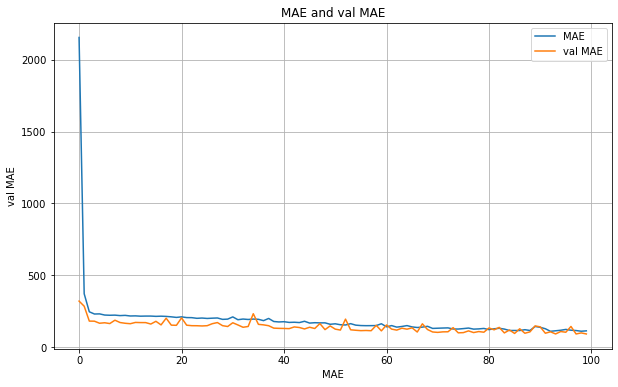

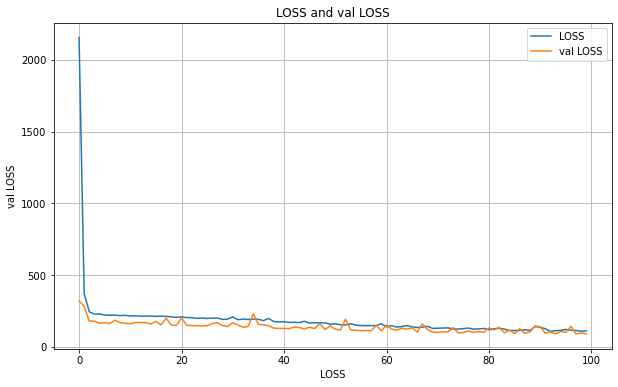

6/6 [==============================] - 0s 23ms/step


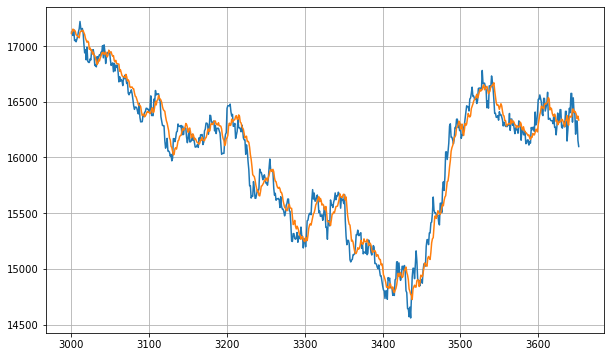

{'mae': 89.526115,
 'mse': 13226.565,
 'rmse': 115.006805,
 'mape': 0.56380033,
 'mase': 1.7299178}

In [5]:
# Load in best performing model
model_1 = tf.keras.models.load_model("model_experiments/model_1/")
model_1.evaluate(valid_set)

# Get mae and loss from history log
mae=history_1.history['mae']
val_mae=history_1.history['val_mae']
loss=history_1.history['loss']
val_loss=history_1.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_1, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_1 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_1))

eval_model_1 = evaluate_preds(y_true=x_valid,
                               y_pred=results_1)
eval_model_1

In [6]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_2")

# Get initial weights
init_weights = model_2.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_2.set_weights(init_weights)

model_2.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_2.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_2 = model_2.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_2.name)])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,129
Trainable params: 8,129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     17/Unknown - 1s 19ms/step - loss: 3173.1475 - mae: 3173.6475

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 60ms/step - loss: 2672.9790 - mae: 2673.4790 - val_loss: 1057.0778 - val_mae: 1057.5778
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 599.9750 - mae: 600.4749

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 59ms/step - loss: 553.7688 - mae: 554.2687 - val_loss: 340.8034 - val_mae: 341.3022
Epoch 3/100
16/24 [===================>..........] - ETA: 0s - loss: 339.7158 - mae: 340.2156

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 50ms/step - loss: 334.5629 - mae: 335.0625 - val_loss: 295.3530 - val_mae: 295.8526
Epoch 4/100
17/24 [====================>.........] - ETA: 0s - loss: 314.9447 - mae: 315.4445

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 310.3686 - mae: 310.8683 - val_loss: 210.6992 - val_mae: 211.1984
Epoch 5/100
24/24 [==============================] - 1s 20ms/step - loss: 281.9316 - mae: 282.4309 - val_loss: 275.0345 - val_mae: 275.5336
Epoch 6/100
17/24 [====================>.........] - ETA: 0s - loss: 277.3435 - mae: 277.8431

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 277.3385 - mae: 277.8380 - val_loss: 207.7243 - val_mae: 208.2243
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 302.3582 - mae: 302.8579

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 285.3449 - mae: 285.8446 - val_loss: 191.4140 - val_mae: 191.9136
Epoch 8/100
24/24 [==============================] - 1s 21ms/step - loss: 256.6020 - mae: 257.1016 - val_loss: 227.0321 - val_mae: 227.5318
Epoch 9/100
24/24 [==============================] - 1s 18ms/step - loss: 306.2514 - mae: 306.7513 - val_loss: 324.1456 - val_mae: 324.6454
Epoch 10/100
24/24 [==============================] - 1s 19ms/step - loss: 280.9314 - mae: 281.4305 - val_loss: 481.3445 - val_mae: 481.8445
Epoch 11/100
24/24 [==============================] - 1s 19ms/step - loss: 337.2357 - mae: 337.7350 - val_loss: 331.2264 - val_mae: 331.7264
Epoch 12/100
24/24 [==============================] - 1s 19ms/step - loss: 235.7041 - mae: 236.2036 - val_loss: 250.7027 - val_mae: 251.2027
Epoch 13/100
24/24 [==============================] - 1s 19ms/step - loss: 246.7662 - mae: 247.2658 - val_loss: 415.2375 - val_mae: 415.7375
Epoch 14/100
24/24 [========

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 52ms/step - loss: 283.4274 - mae: 283.9269 - val_loss: 133.6331 - val_mae: 134.1313
Epoch 16/100
24/24 [==============================] - 1s 19ms/step - loss: 188.1201 - mae: 188.6197 - val_loss: 147.3847 - val_mae: 147.8847
Epoch 17/100
24/24 [==============================] - 1s 19ms/step - loss: 227.8541 - mae: 228.3538 - val_loss: 134.1283 - val_mae: 134.6283
Epoch 18/100
15/24 [=================>............] - ETA: 0s - loss: 177.1835 - mae: 177.6828

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 52ms/step - loss: 181.0033 - mae: 181.5025 - val_loss: 123.7086 - val_mae: 124.2064
Epoch 19/100
15/24 [=================>............] - ETA: 0s - loss: 159.0667 - mae: 159.5657

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 176.5742 - mae: 177.0735 - val_loss: 110.8680 - val_mae: 111.3677
Epoch 20/100
24/24 [==============================] - 1s 19ms/step - loss: 156.7559 - mae: 157.2554 - val_loss: 262.7298 - val_mae: 263.2298
Epoch 21/100
24/24 [==============================] - 1s 19ms/step - loss: 377.1463 - mae: 377.6461 - val_loss: 202.7939 - val_mae: 203.2939
Epoch 22/100
24/24 [==============================] - 1s 19ms/step - loss: 578.5074 - mae: 579.0074 - val_loss: 539.2240 - val_mae: 539.7240
Epoch 23/100
24/24 [==============================] - 1s 20ms/step - loss: 519.2410 - mae: 519.7407 - val_loss: 223.0122 - val_mae: 223.5119
Epoch 24/100
24/24 [==============================] - 1s 18ms/step - loss: 467.0932 - mae: 467.5928 - val_loss: 524.9150 - val_mae: 525.4150
Epoch 25/100
24/24 [==============================] - 1s 19ms/step - loss: 338.9594 - mae: 339.4591 - val_loss: 151.7108 - val_mae: 152.2101
Epoch 26/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 50ms/step - loss: 161.3239 - mae: 161.8231 - val_loss: 103.7880 - val_mae: 104.2880
Epoch 34/100
16/24 [===================>..........] - ETA: 0s - loss: 150.2091 - mae: 150.7085

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 2s 58ms/step - loss: 146.0917 - mae: 146.5908 - val_loss: 100.4599 - val_mae: 100.9585
Epoch 35/100
24/24 [==============================] - 1s 19ms/step - loss: 152.6934 - mae: 153.1926 - val_loss: 240.4064 - val_mae: 240.9064
Epoch 36/100
24/24 [==============================] - 1s 18ms/step - loss: 196.7325 - mae: 197.2315 - val_loss: 338.6664 - val_mae: 339.1664
Epoch 37/100
24/24 [==============================] - 1s 19ms/step - loss: 264.4209 - mae: 264.9208 - val_loss: 102.7384 - val_mae: 103.2377
Epoch 38/100
24/24 [==============================] - 1s 19ms/step - loss: 242.5823 - mae: 243.0819 - val_loss: 208.9959 - val_mae: 209.4959
Epoch 39/100
24/24 [==============================] - 1s 19ms/step - loss: 210.4651 - mae: 210.9645 - val_loss: 379.7209 - val_mae: 380.2209
Epoch 40/100
24/24 [==============================] - 1s 20ms/step - loss: 242.4416 - mae: 242.9414 - val_loss: 272.3050 - val_mae: 272.8047
Epoch 41/100
15/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 50ms/step - loss: 192.3631 - mae: 192.8622 - val_loss: 96.2359 - val_mae: 96.7341
Epoch 42/100
24/24 [==============================] - 1s 19ms/step - loss: 184.6954 - mae: 185.1946 - val_loss: 98.4852 - val_mae: 98.9841
Epoch 43/100
15/24 [=================>............] - ETA: 0s - loss: 115.6972 - mae: 116.1961

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 114.5772 - mae: 115.0763 - val_loss: 94.0210 - val_mae: 94.5188
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 196.1803 - mae: 196.6797 - val_loss: 103.6442 - val_mae: 104.1434
Epoch 45/100
24/24 [==============================] - 1s 19ms/step - loss: 223.8165 - mae: 224.3161 - val_loss: 241.0275 - val_mae: 241.5275
Epoch 46/100
24/24 [==============================] - 1s 19ms/step - loss: 149.5360 - mae: 150.0355 - val_loss: 295.1481 - val_mae: 295.6481
Epoch 47/100
24/24 [==============================] - 1s 19ms/step - loss: 152.7385 - mae: 153.2380 - val_loss: 155.6110 - val_mae: 156.1091
Epoch 48/100
24/24 [==============================] - 1s 19ms/step - loss: 140.4323 - mae: 140.9314 - val_loss: 166.3896 - val_mae: 166.8896
Epoch 49/100
24/24 [==============================] - 1s 19ms/step - loss: 223.4483 - mae: 223.9480 - val_loss: 291.3698 - val_mae: 291.8698
Epoch 50/100
24/24 [========

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 51ms/step - loss: 168.6486 - mae: 169.1478 - val_loss: 87.0550 - val_mae: 87.5539
Epoch 56/100
24/24 [==============================] - 1s 23ms/step - loss: 110.4735 - mae: 110.9725 - val_loss: 97.1666 - val_mae: 97.6647
Epoch 57/100
24/24 [==============================] - 1s 21ms/step - loss: 192.1675 - mae: 192.6672 - val_loss: 143.1198 - val_mae: 143.6193
Epoch 58/100
24/24 [==============================] - 1s 23ms/step - loss: 202.5789 - mae: 203.0782 - val_loss: 137.5908 - val_mae: 138.0904
Epoch 59/100
24/24 [==============================] - 1s 22ms/step - loss: 192.6555 - mae: 193.1551 - val_loss: 119.7934 - val_mae: 120.2930
Epoch 60/100
24/24 [==============================] - 1s 23ms/step - loss: 176.4422 - mae: 176.9417 - val_loss: 194.9370 - val_mae: 195.4370
Epoch 61/100
24/24 [==============================] - 1s 24ms/step - loss: 128.8254 - mae: 129.3246 - val_loss: 165.1828 - val_mae: 165.6828
Epoch 62/100
24/24 [==========

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 54ms/step - loss: 114.1276 - mae: 114.6272 - val_loss: 84.2753 - val_mae: 84.7730
Epoch 66/100
24/24 [==============================] - 1s 20ms/step - loss: 139.8953 - mae: 140.3943 - val_loss: 101.5098 - val_mae: 102.0097
Epoch 67/100
24/24 [==============================] - 1s 18ms/step - loss: 204.9030 - mae: 205.4028 - val_loss: 95.3717 - val_mae: 95.8705
Epoch 68/100
24/24 [==============================] - 1s 19ms/step - loss: 115.9510 - mae: 116.4499 - val_loss: 170.8846 - val_mae: 171.3846
Epoch 69/100
24/24 [==============================] - 1s 20ms/step - loss: 120.9077 - mae: 121.4069 - val_loss: 84.9932 - val_mae: 85.4910
Epoch 70/100
15/24 [=================>............] - ETA: 0s - loss: 110.2262 - mae: 110.7252

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 54ms/step - loss: 106.1925 - mae: 106.6917 - val_loss: 82.6076 - val_mae: 83.1062
Epoch 71/100
24/24 [==============================] - 1s 19ms/step - loss: 113.4312 - mae: 113.9307 - val_loss: 127.2921 - val_mae: 127.7919
Epoch 72/100
24/24 [==============================] - 1s 18ms/step - loss: 168.3197 - mae: 168.8192 - val_loss: 278.5314 - val_mae: 279.0314
Epoch 73/100
24/24 [==============================] - 1s 19ms/step - loss: 160.4137 - mae: 160.9129 - val_loss: 160.9399 - val_mae: 161.4397
Epoch 74/100
24/24 [==============================] - 1s 19ms/step - loss: 196.6151 - mae: 197.1146 - val_loss: 246.8639 - val_mae: 247.3639
Epoch 75/100
24/24 [==============================] - 1s 20ms/step - loss: 193.2282 - mae: 193.7276 - val_loss: 227.6723 - val_mae: 228.1723
Epoch 76/100
24/24 [==============================] - 1s 23ms/step - loss: 182.7012 - mae: 183.2008 - val_loss: 92.3868 - val_mae: 92.8860
Epoch 77/100
24/24 [==========

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


24/24 [==============================] - 1s 50ms/step - loss: 184.5542 - mae: 185.0536 - val_loss: 77.7344 - val_mae: 78.2331
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 176.0140 - mae: 176.5140 - val_loss: 120.5181 - val_mae: 121.0171
Epoch 98/100
24/24 [==============================] - 1s 19ms/step - loss: 103.9164 - mae: 104.4157 - val_loss: 85.4817 - val_mae: 85.9798
Epoch 99/100
24/24 [==============================] - 1s 18ms/step - loss: 109.5697 - mae: 110.0686 - val_loss: 98.7583 - val_mae: 99.2578
Epoch 100/100
24/24 [==============================] - 1s 20ms/step - loss: 115.3448 - mae: 115.8439 - val_loss: 235.9229 - val_mae: 236.4229


5/5 [==============================] - 0s 11ms/step - loss: 77.7344 - mae: 78.2331


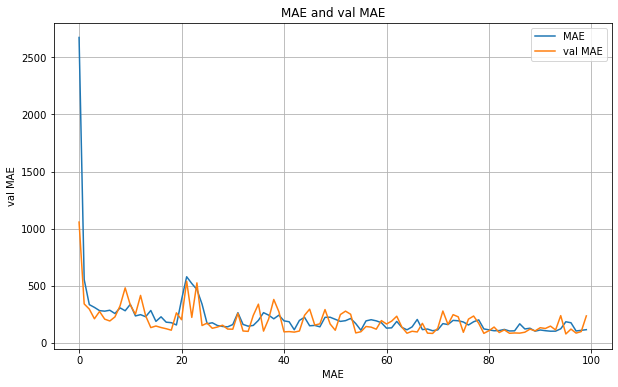

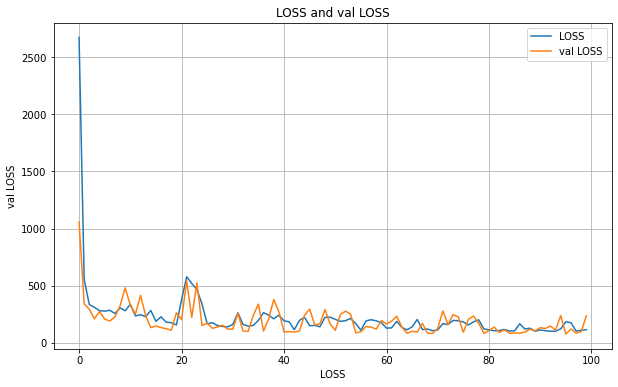

6/6 [==============================] - 0s 23ms/step


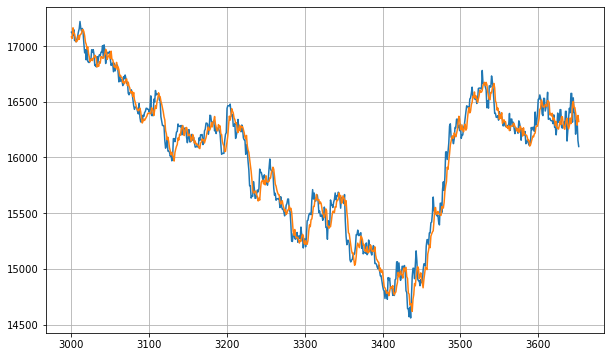

{'mae': 77.26342,
 'mse': 9825.1875,
 'rmse': 99.122086,
 'mape': 0.4857047,
 'mase': 1.4929651}

In [7]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_set)

# Get mae and loss from history log
mae=history_2.history['mae']
val_mae=history_2.history['val_mae']
loss=history_2.history['loss']
val_loss=history_2.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_2 = model_forecast(model_2, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_2 = forecast_2.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_2))

eval_model_2 = evaluate_preds(y_true=x_valid,
                               y_pred=results_2)
eval_model_2

In [8]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_3")

# Get initial weights
init_weights = model_3.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_3.set_weights(init_weights)

model_3.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_3.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_3 = model_3.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_3.name)])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     15/Unknown - 1s 22ms/step - loss: 28045.8770 - mae: 28046.3770

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 2s 60ms/step - loss: 25774.8066 - mae: 25775.3047 - val_loss: 17857.4180 - val_mae: 17857.9199
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 13513.6445 - mae: 13514.1445

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 45ms/step - loss: 11538.7666 - mae: 11539.2656 - val_loss: 4750.3760 - val_mae: 4750.8760
Epoch 3/100
14/24 [================>.............] - ETA: 0s - loss: 1919.8846 - mae: 1920.3846

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 45ms/step - loss: 1707.2596 - mae: 1707.7596 - val_loss: 507.8022 - val_mae: 508.3022
Epoch 4/100
18/24 [=====================>........] - ETA: 0s - loss: 394.6667 - mae: 395.1664

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 375.1637 - mae: 375.6634 - val_loss: 201.1013 - val_mae: 201.6013
Epoch 5/100
17/24 [====================>.........] - ETA: 0s - loss: 285.6932 - mae: 286.1923

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 47ms/step - loss: 275.0177 - mae: 275.5170 - val_loss: 200.7205 - val_mae: 201.2205
Epoch 6/100
15/24 [=================>............] - ETA: 0s - loss: 274.9796 - mae: 275.4795

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 47ms/step - loss: 267.9268 - mae: 268.4266 - val_loss: 191.7466 - val_mae: 192.2462
Epoch 7/100
24/24 [==============================] - 1s 19ms/step - loss: 259.7526 - mae: 260.2523 - val_loss: 195.1337 - val_mae: 195.6330
Epoch 8/100
15/24 [=================>............] - ETA: 0s - loss: 262.1599 - mae: 262.6592

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 258.2378 - mae: 258.7372 - val_loss: 191.5973 - val_mae: 192.0967
Epoch 9/100
24/24 [==============================] - 1s 19ms/step - loss: 259.4845 - mae: 259.9840 - val_loss: 193.2625 - val_mae: 193.7623
Epoch 10/100
24/24 [==============================] - 1s 19ms/step - loss: 257.6535 - mae: 258.1531 - val_loss: 196.0105 - val_mae: 196.5094
Epoch 11/100
15/24 [=================>............] - ETA: 0s - loss: 262.6170 - mae: 263.1168

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 257.1306 - mae: 257.6303 - val_loss: 190.0312 - val_mae: 190.5312
Epoch 12/100
24/24 [==============================] - 1s 19ms/step - loss: 259.0602 - mae: 259.5594 - val_loss: 204.9908 - val_mae: 205.4898
Epoch 13/100
24/24 [==============================] - 1s 19ms/step - loss: 256.6006 - mae: 257.1000 - val_loss: 198.7926 - val_mae: 199.2925
Epoch 14/100
24/24 [==============================] - 1s 19ms/step - loss: 255.4884 - mae: 255.9880 - val_loss: 194.9337 - val_mae: 195.4333
Epoch 15/100
24/24 [==============================] - 1s 19ms/step - loss: 255.6640 - mae: 256.1635 - val_loss: 190.5460 - val_mae: 191.0452
Epoch 16/100
24/24 [==============================] - 1s 19ms/step - loss: 256.2213 - mae: 256.7211 - val_loss: 199.1059 - val_mae: 199.6055
Epoch 17/100
24/24 [==============================] - 1s 18ms/step - loss: 254.4009 - mae: 254.9003 - val_loss: 194.9541 - val_mae: 195.4540
Epoch 18/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 253.4037 - mae: 253.9034 - val_loss: 187.1591 - val_mae: 187.6583
Epoch 22/100
24/24 [==============================] - 1s 18ms/step - loss: 251.6594 - mae: 252.1587 - val_loss: 188.7417 - val_mae: 189.2402
Epoch 23/100
24/24 [==============================] - 1s 19ms/step - loss: 251.8510 - mae: 252.3507 - val_loss: 187.4156 - val_mae: 187.9151
Epoch 24/100
24/24 [==============================] - 1s 19ms/step - loss: 253.3164 - mae: 253.8161 - val_loss: 191.8750 - val_mae: 192.3734
Epoch 25/100
24/24 [==============================] - 1s 20ms/step - loss: 253.7874 - mae: 254.2869 - val_loss: 192.9084 - val_mae: 193.4072
Epoch 26/100
24/24 [==============================] - 1s 21ms/step - loss: 253.1597 - mae: 253.6593 - val_loss: 198.5214 - val_mae: 199.0210
Epoch 27/100
24/24 [==============================] - ETA: 0s - loss: 252.3923 - mae: 252.8916

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 47ms/step - loss: 252.3923 - mae: 252.8916 - val_loss: 185.1491 - val_mae: 185.6480
Epoch 28/100
24/24 [==============================] - 1s 21ms/step - loss: 252.4919 - mae: 252.9909 - val_loss: 222.4469 - val_mae: 222.9466
Epoch 29/100
24/24 [==============================] - 1s 19ms/step - loss: 253.7738 - mae: 254.2735 - val_loss: 194.3192 - val_mae: 194.8188
Epoch 30/100
24/24 [==============================] - 1s 18ms/step - loss: 252.5578 - mae: 253.0572 - val_loss: 186.3496 - val_mae: 186.8493
Epoch 31/100
16/24 [===================>..........] - ETA: 0s - loss: 253.0994 - mae: 253.5989

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 248.5550 - mae: 249.0545 - val_loss: 183.1326 - val_mae: 183.6326
Epoch 32/100
24/24 [==============================] - 1s 19ms/step - loss: 254.3875 - mae: 254.8873 - val_loss: 184.4299 - val_mae: 184.9290
Epoch 33/100
24/24 [==============================] - 1s 19ms/step - loss: 251.2039 - mae: 251.7033 - val_loss: 187.4485 - val_mae: 187.9485
Epoch 34/100
24/24 [==============================] - 1s 24ms/step - loss: 257.3146 - mae: 257.8141 - val_loss: 183.9806 - val_mae: 184.4797
Epoch 35/100
24/24 [==============================] - 1s 24ms/step - loss: 252.4535 - mae: 252.9532 - val_loss: 190.3282 - val_mae: 190.8275
Epoch 36/100
24/24 [==============================] - 1s 25ms/step - loss: 249.5425 - mae: 250.0420 - val_loss: 183.8574 - val_mae: 184.3570
Epoch 37/100
24/24 [==============================] - 1s 24ms/step - loss: 250.6728 - mae: 251.1722 - val_loss: 184.7236 - val_mae: 185.2234
Epoch 38/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 49ms/step - loss: 253.8428 - mae: 254.3424 - val_loss: 180.7847 - val_mae: 181.2847
Epoch 40/100
14/24 [================>.............] - ETA: 0s - loss: 251.7191 - mae: 252.2187

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 54ms/step - loss: 247.2569 - mae: 247.7565 - val_loss: 179.5878 - val_mae: 180.0878
Epoch 41/100
24/24 [==============================] - 1s 19ms/step - loss: 244.9597 - mae: 245.4595 - val_loss: 184.9159 - val_mae: 185.4158
Epoch 42/100
24/24 [==============================] - 1s 19ms/step - loss: 240.9995 - mae: 241.4990 - val_loss: 180.4729 - val_mae: 180.9729
Epoch 43/100
15/24 [=================>............] - ETA: 0s - loss: 243.7484 - mae: 244.2483

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 241.2613 - mae: 241.7610 - val_loss: 178.0875 - val_mae: 178.5875
Epoch 44/100
24/24 [==============================] - 1s 18ms/step - loss: 247.1253 - mae: 247.6248 - val_loss: 178.1129 - val_mae: 178.6129
Epoch 45/100
24/24 [==============================] - 1s 18ms/step - loss: 243.3986 - mae: 243.8981 - val_loss: 179.5753 - val_mae: 180.0746
Epoch 46/100
24/24 [==============================] - 1s 18ms/step - loss: 242.8813 - mae: 243.3809 - val_loss: 179.5004 - val_mae: 179.9995
Epoch 47/100
24/24 [==============================] - 1s 18ms/step - loss: 238.8995 - mae: 239.3989 - val_loss: 182.1006 - val_mae: 182.5986
Epoch 48/100
15/24 [=================>............] - ETA: 0s - loss: 244.0264 - mae: 244.5261

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 42ms/step - loss: 243.8434 - mae: 244.3432 - val_loss: 176.0696 - val_mae: 176.5696
Epoch 49/100
24/24 [==============================] - 1s 19ms/step - loss: 236.6600 - mae: 237.1594 - val_loss: 178.0344 - val_mae: 178.5344
Epoch 50/100
24/24 [==============================] - 1s 19ms/step - loss: 237.8271 - mae: 238.3267 - val_loss: 188.8864 - val_mae: 189.3858
Epoch 51/100
24/24 [==============================] - 1s 18ms/step - loss: 235.6566 - mae: 236.1560 - val_loss: 182.3358 - val_mae: 182.8345
Epoch 52/100
24/24 [==============================] - 1s 18ms/step - loss: 237.2798 - mae: 237.7794 - val_loss: 176.4658 - val_mae: 176.9658
Epoch 53/100
15/24 [=================>............] - ETA: 0s - loss: 237.2498 - mae: 237.7490

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 233.9848 - mae: 234.4843 - val_loss: 175.0045 - val_mae: 175.5037
Epoch 54/100
24/24 [==============================] - 1s 18ms/step - loss: 236.0561 - mae: 236.5553 - val_loss: 178.2935 - val_mae: 178.7928
Epoch 55/100
17/24 [====================>.........] - ETA: 0s - loss: 235.8163 - mae: 236.3159

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 235.6823 - mae: 236.1820 - val_loss: 172.9291 - val_mae: 173.4289
Epoch 56/100
24/24 [==============================] - 1s 19ms/step - loss: 235.5499 - mae: 236.0494 - val_loss: 179.0869 - val_mae: 179.5858
Epoch 57/100
15/24 [=================>............] - ETA: 0s - loss: 237.6163 - mae: 238.1161

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 231.7343 - mae: 232.2342 - val_loss: 172.2185 - val_mae: 172.7175
Epoch 58/100
24/24 [==============================] - 1s 27ms/step - loss: 234.1620 - mae: 234.6616 - val_loss: 191.4694 - val_mae: 191.9688
Epoch 59/100
24/24 [==============================] - 1s 19ms/step - loss: 236.3748 - mae: 236.8745 - val_loss: 175.5435 - val_mae: 176.0435
Epoch 60/100
15/24 [=================>............] - ETA: 0s - loss: 240.1670 - mae: 240.6665

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 45ms/step - loss: 237.0881 - mae: 237.5874 - val_loss: 170.5547 - val_mae: 171.0536
Epoch 61/100
24/24 [==============================] - 1s 19ms/step - loss: 231.5722 - mae: 232.0714 - val_loss: 178.8728 - val_mae: 179.3724
Epoch 62/100
24/24 [==============================] - 1s 22ms/step - loss: 232.2841 - mae: 232.7831 - val_loss: 174.9601 - val_mae: 175.4593
Epoch 63/100
24/24 [==============================] - 1s 19ms/step - loss: 229.5035 - mae: 230.0027 - val_loss: 172.2741 - val_mae: 172.7737
Epoch 64/100
14/24 [================>.............] - ETA: 0s - loss: 228.3134 - mae: 228.8126

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 48ms/step - loss: 229.6466 - mae: 230.1455 - val_loss: 169.5021 - val_mae: 170.0016
Epoch 65/100
17/24 [====================>.........] - ETA: 0s - loss: 230.1437 - mae: 230.6433

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 227.5127 - mae: 228.0124 - val_loss: 168.2741 - val_mae: 168.7728
Epoch 66/100
24/24 [==============================] - 1s 19ms/step - loss: 227.9869 - mae: 228.4859 - val_loss: 171.3604 - val_mae: 171.8604
Epoch 67/100
24/24 [==============================] - 1s 18ms/step - loss: 226.2747 - mae: 226.7743 - val_loss: 179.7278 - val_mae: 180.2276
Epoch 68/100
24/24 [==============================] - 1s 19ms/step - loss: 232.1039 - mae: 232.6032 - val_loss: 168.4039 - val_mae: 168.9030
Epoch 69/100
24/24 [==============================] - 1s 35ms/step - loss: 226.0539 - mae: 226.5531 - val_loss: 183.1985 - val_mae: 183.6982
Epoch 70/100
20/24 [========================>.....] - ETA: 0s - loss: 231.5119 - mae: 232.0111

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 48ms/step - loss: 227.2368 - mae: 227.7360 - val_loss: 167.4233 - val_mae: 167.9233
Epoch 71/100
24/24 [==============================] - 1s 20ms/step - loss: 226.9631 - mae: 227.4624 - val_loss: 168.5644 - val_mae: 169.0628
Epoch 72/100
24/24 [==============================] - 1s 19ms/step - loss: 226.1339 - mae: 226.6332 - val_loss: 169.1723 - val_mae: 169.6715
Epoch 73/100
16/24 [===================>..........] - ETA: 0s - loss: 229.7058 - mae: 230.2053

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 223.1192 - mae: 223.6185 - val_loss: 165.2370 - val_mae: 165.7361
Epoch 74/100
24/24 [==============================] - 1s 18ms/step - loss: 220.5960 - mae: 221.0952 - val_loss: 189.8322 - val_mae: 190.3322
Epoch 75/100
17/24 [====================>.........] - ETA: 0s - loss: 230.6999 - mae: 231.1990

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 224.7613 - mae: 225.2604 - val_loss: 164.3363 - val_mae: 164.8360
Epoch 76/100
24/24 [==============================] - 1s 18ms/step - loss: 221.2213 - mae: 221.7210 - val_loss: 171.7858 - val_mae: 172.2855
Epoch 77/100
24/24 [==============================] - 1s 19ms/step - loss: 219.7080 - mae: 220.2073 - val_loss: 166.3825 - val_mae: 166.8820
Epoch 78/100
24/24 [==============================] - 1s 19ms/step - loss: 221.5886 - mae: 222.0881 - val_loss: 165.7524 - val_mae: 166.2520
Epoch 79/100
24/24 [==============================] - 1s 19ms/step - loss: 218.3181 - mae: 218.8175 - val_loss: 172.5932 - val_mae: 173.0928
Epoch 80/100
14/24 [================>.............] - ETA: 0s - loss: 219.4972 - mae: 219.9971

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 52ms/step - loss: 219.4475 - mae: 219.9470 - val_loss: 161.6394 - val_mae: 162.1387
Epoch 81/100
24/24 [==============================] - 1s 18ms/step - loss: 217.6262 - mae: 218.1256 - val_loss: 162.7293 - val_mae: 163.2289
Epoch 82/100
15/24 [=================>............] - ETA: 0s - loss: 219.1872 - mae: 219.6868

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 42ms/step - loss: 217.9296 - mae: 218.4291 - val_loss: 160.3428 - val_mae: 160.8416
Epoch 83/100
24/24 [==============================] - 1s 19ms/step - loss: 215.2949 - mae: 215.7941 - val_loss: 163.8628 - val_mae: 164.3621
Epoch 84/100
24/24 [==============================] - 1s 21ms/step - loss: 217.7124 - mae: 218.2120 - val_loss: 160.9584 - val_mae: 161.4583
Epoch 85/100
15/24 [=================>............] - ETA: 0s - loss: 214.9774 - mae: 215.4765

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 45ms/step - loss: 215.8435 - mae: 216.3426 - val_loss: 158.8838 - val_mae: 159.3825
Epoch 86/100
24/24 [==============================] - 1s 18ms/step - loss: 217.1759 - mae: 217.6754 - val_loss: 174.5889 - val_mae: 175.0884
Epoch 87/100
24/24 [==============================] - 1s 20ms/step - loss: 219.8542 - mae: 220.3535 - val_loss: 168.9036 - val_mae: 169.4019
Epoch 88/100
24/24 [==============================] - 1s 19ms/step - loss: 213.7712 - mae: 214.2707 - val_loss: 167.1620 - val_mae: 167.6620
Epoch 89/100
15/24 [=================>............] - ETA: 0s - loss: 219.6313 - mae: 220.1309

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 214.8262 - mae: 215.3257 - val_loss: 157.0199 - val_mae: 157.5187
Epoch 90/100
24/24 [==============================] - 1s 20ms/step - loss: 210.2613 - mae: 210.7605 - val_loss: 158.0164 - val_mae: 158.5164
Epoch 91/100
24/24 [==============================] - 1s 18ms/step - loss: 214.6474 - mae: 215.1466 - val_loss: 162.0390 - val_mae: 162.5383
Epoch 92/100
24/24 [==============================] - 1s 18ms/step - loss: 210.0344 - mae: 210.5342 - val_loss: 161.1764 - val_mae: 161.6752
Epoch 93/100
17/24 [====================>.........] - ETA: 0s - loss: 216.2396 - mae: 216.7386

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 44ms/step - loss: 209.8600 - mae: 210.3591 - val_loss: 155.6330 - val_mae: 156.1330
Epoch 94/100
24/24 [==============================] - 1s 19ms/step - loss: 209.7972 - mae: 210.2964 - val_loss: 171.1728 - val_mae: 171.6725
Epoch 95/100
24/24 [==============================] - 1s 18ms/step - loss: 207.9245 - mae: 208.4241 - val_loss: 159.5231 - val_mae: 160.0226
Epoch 96/100
18/24 [=====================>........] - ETA: 0s - loss: 210.4178 - mae: 210.9173

INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


24/24 [==============================] - 1s 43ms/step - loss: 208.2990 - mae: 208.7984 - val_loss: 154.1563 - val_mae: 154.6554
Epoch 97/100
24/24 [==============================] - 1s 18ms/step - loss: 213.2972 - mae: 213.7967 - val_loss: 158.2525 - val_mae: 158.7504
Epoch 98/100
24/24 [==============================] - 1s 18ms/step - loss: 207.9200 - mae: 208.4196 - val_loss: 159.4940 - val_mae: 159.9936
Epoch 99/100
24/24 [==============================] - 1s 18ms/step - loss: 207.5743 - mae: 208.0738 - val_loss: 156.3723 - val_mae: 156.8719
Epoch 100/100
24/24 [==============================] - 1s 21ms/step - loss: 203.6801 - mae: 204.1796 - val_loss: 174.1878 - val_mae: 174.6864


5/5 [==============================] - 0s 11ms/step - loss: 154.1563 - mae: 154.6554


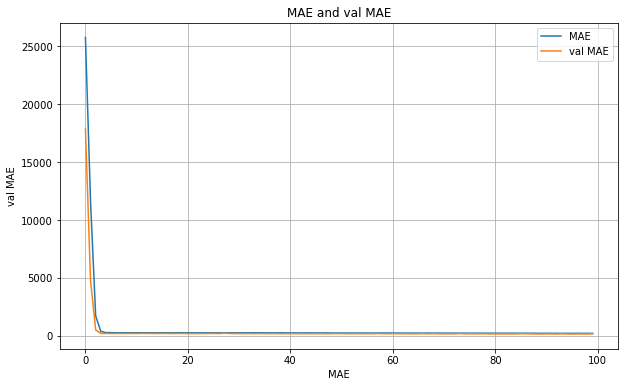

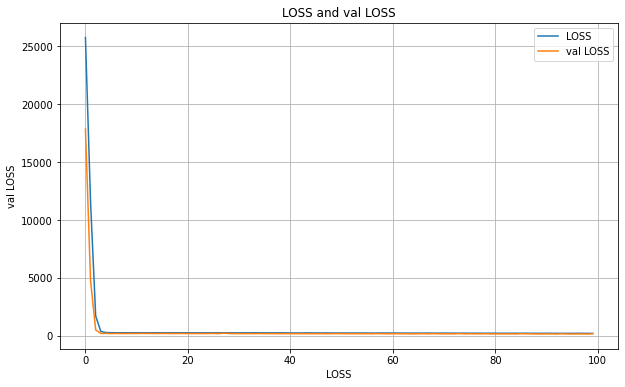

6/6 [==============================] - 0s 23ms/step


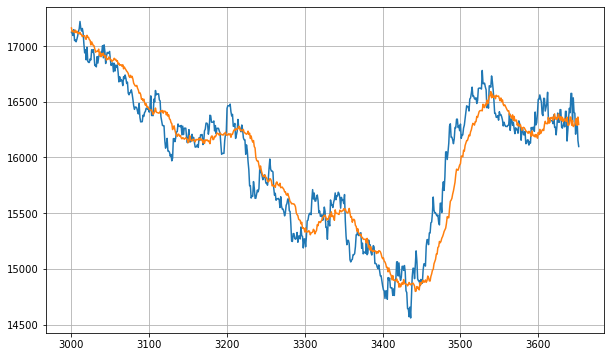

{'mae': 151.55905,
 'mse': 39240.14,
 'rmse': 198.09125,
 'mape': 0.95295507,
 'mase': 2.9285834}

In [9]:
# Load in best performing model
model_3 = tf.keras.models.load_model("model_experiments/model_3/")
model_3.evaluate(valid_set)

# Get mae and loss from history log
mae=history_3.history['mae']
val_mae=history_3.history['val_mae']
loss=history_3.history['loss']
val_loss=history_3.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_3 = model_forecast(model_3, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_3 = forecast_3.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_3))

eval_model_3 = evaluate_preds(y_true=x_valid,
                               y_pred=results_3)
eval_model_3

In [10]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_4")

# Get initial weights
init_weights = model_4.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_4.set_weights(init_weights)

model_4.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_4.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_4 = model_4.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_4.name)])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,389
Trainable params: 2,389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     15/Unknown - 2s 22ms/step - loss: 5865.7983 - mae: 5866.2983

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 3s 69ms/step - loss: 4011.5605 - mae: 4012.0603 - val_loss: 512.3281 - val_mae: 512.8281
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 325.3869 - mae: 325.8869

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 64ms/step - loss: 308.1056 - mae: 308.6054 - val_loss: 238.9974 - val_mae: 239.4970
Epoch 3/100
15/24 [=================>............] - ETA: 0s - loss: 307.3130 - mae: 307.8122

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 58ms/step - loss: 295.0544 - mae: 295.5536 - val_loss: 227.9626 - val_mae: 228.4623
Epoch 4/100
24/24 [==============================] - 1s 19ms/step - loss: 284.3484 - mae: 284.8482 - val_loss: 236.0441 - val_mae: 236.5437
Epoch 5/100
24/24 [==============================] - 1s 19ms/step - loss: 273.6467 - mae: 274.1459 - val_loss: 242.9824 - val_mae: 243.4822
Epoch 6/100
17/24 [====================>.........] - ETA: 0s - loss: 308.8618 - mae: 309.3616

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 56ms/step - loss: 304.5016 - mae: 305.0013 - val_loss: 197.9287 - val_mae: 198.4286
Epoch 7/100
24/24 [==============================] - 1s 20ms/step - loss: 285.0345 - mae: 285.5341 - val_loss: 218.4128 - val_mae: 218.9126
Epoch 8/100
24/24 [==============================] - 1s 19ms/step - loss: 275.2109 - mae: 275.7106 - val_loss: 215.9074 - val_mae: 216.4074
Epoch 9/100
15/24 [=================>............] - ETA: 0s - loss: 252.9671 - mae: 253.4669

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 58ms/step - loss: 253.6878 - mae: 254.1874 - val_loss: 186.5905 - val_mae: 187.0899
Epoch 10/100
24/24 [==============================] - 1s 20ms/step - loss: 269.8790 - mae: 270.3786 - val_loss: 191.7453 - val_mae: 192.2447
Epoch 11/100
17/24 [====================>.........] - ETA: 0s - loss: 248.5142 - mae: 249.0131

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 247.1890 - mae: 247.6882 - val_loss: 178.8666 - val_mae: 179.3665
Epoch 12/100
24/24 [==============================] - 1s 20ms/step - loss: 253.2295 - mae: 253.7290 - val_loss: 302.5923 - val_mae: 303.0923
Epoch 13/100
24/24 [==============================] - 1s 19ms/step - loss: 256.1136 - mae: 256.6126 - val_loss: 273.2246 - val_mae: 273.7238
Epoch 14/100
24/24 [==============================] - 1s 20ms/step - loss: 245.2579 - mae: 245.7577 - val_loss: 233.1116 - val_mae: 233.6116
Epoch 15/100
15/24 [=================>............] - ETA: 0s - loss: 259.6527 - mae: 260.1523

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 56ms/step - loss: 257.1308 - mae: 257.6306 - val_loss: 167.3783 - val_mae: 167.8774
Epoch 16/100
24/24 [==============================] - 1s 18ms/step - loss: 224.4437 - mae: 224.9430 - val_loss: 252.1521 - val_mae: 252.6519
Epoch 17/100
24/24 [==============================] - 1s 18ms/step - loss: 270.4250 - mae: 270.9243 - val_loss: 205.9294 - val_mae: 206.4294
Epoch 18/100
24/24 [==============================] - 1s 18ms/step - loss: 219.0734 - mae: 219.5733 - val_loss: 191.5924 - val_mae: 192.0922
Epoch 19/100
24/24 [==============================] - 1s 18ms/step - loss: 212.8543 - mae: 213.3539 - val_loss: 173.0002 - val_mae: 173.4992
Epoch 20/100
24/24 [==============================] - 1s 18ms/step - loss: 226.4982 - mae: 226.9978 - val_loss: 434.4383 - val_mae: 434.9383
Epoch 21/100
15/24 [=================>............] - ETA: 0s - loss: 300.7740 - mae: 301.2737

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 56ms/step - loss: 284.3013 - mae: 284.8008 - val_loss: 149.4456 - val_mae: 149.9451
Epoch 22/100
24/24 [==============================] - 1s 18ms/step - loss: 212.2102 - mae: 212.7095 - val_loss: 199.5654 - val_mae: 200.0652
Epoch 23/100
24/24 [==============================] - 1s 18ms/step - loss: 243.7393 - mae: 244.2389 - val_loss: 204.0829 - val_mae: 204.5825
Epoch 24/100
24/24 [==============================] - 1s 19ms/step - loss: 196.2278 - mae: 196.7271 - val_loss: 203.5760 - val_mae: 204.0760
Epoch 25/100
24/24 [==============================] - 1s 19ms/step - loss: 210.2034 - mae: 210.7029 - val_loss: 170.0604 - val_mae: 170.5596
Epoch 26/100
24/24 [==============================] - 1s 19ms/step - loss: 206.6523 - mae: 207.1517 - val_loss: 242.0398 - val_mae: 242.5397
Epoch 27/100
24/24 [==============================] - 1s 19ms/step - loss: 232.0164 - mae: 232.5157 - val_loss: 162.2379 - val_mae: 162.7373
Epoch 28/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 56ms/step - loss: 182.3717 - mae: 182.8713 - val_loss: 138.2045 - val_mae: 138.7040
Epoch 32/100
24/24 [==============================] - 1s 19ms/step - loss: 196.0269 - mae: 196.5261 - val_loss: 270.0722 - val_mae: 270.5722
Epoch 33/100
24/24 [==============================] - 1s 19ms/step - loss: 198.4217 - mae: 198.9211 - val_loss: 155.1365 - val_mae: 155.6347
Epoch 34/100
24/24 [==============================] - 1s 19ms/step - loss: 180.2177 - mae: 180.7173 - val_loss: 272.0461 - val_mae: 272.5457
Epoch 35/100
15/24 [=================>............] - ETA: 0s - loss: 223.3284 - mae: 223.8283

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 67ms/step - loss: 206.0211 - mae: 206.5210 - val_loss: 125.9380 - val_mae: 126.4372
Epoch 36/100
24/24 [==============================] - 1s 18ms/step - loss: 167.5252 - mae: 168.0240 - val_loss: 227.6627 - val_mae: 228.1623
Epoch 37/100
24/24 [==============================] - 1s 19ms/step - loss: 180.2002 - mae: 180.6996 - val_loss: 161.4597 - val_mae: 161.9584
Epoch 38/100
15/24 [=================>............] - ETA: 0s - loss: 182.0127 - mae: 182.5123

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 178.6888 - mae: 179.1883 - val_loss: 122.8619 - val_mae: 123.3619
Epoch 39/100
24/24 [==============================] - 1s 18ms/step - loss: 154.7104 - mae: 155.2093 - val_loss: 157.2803 - val_mae: 157.7784
Epoch 40/100
24/24 [==============================] - 1s 20ms/step - loss: 154.7391 - mae: 155.2384 - val_loss: 136.7511 - val_mae: 137.2507
Epoch 41/100
24/24 [==============================] - 1s 18ms/step - loss: 161.3848 - mae: 161.8845 - val_loss: 137.1350 - val_mae: 137.6334
Epoch 42/100
24/24 [==============================] - 1s 20ms/step - loss: 159.6475 - mae: 160.1469 - val_loss: 156.7421 - val_mae: 157.2412
Epoch 43/100
24/24 [==============================] - 1s 18ms/step - loss: 155.9268 - mae: 156.4258 - val_loss: 138.6856 - val_mae: 139.1854
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 148.8533 - mae: 149.3524 - val_loss: 257.5121 - val_mae: 258.0121
Epoch 45/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 159.5633 - mae: 160.0625 - val_loss: 121.8948 - val_mae: 122.3933
Epoch 47/100
24/24 [==============================] - 1s 19ms/step - loss: 192.5588 - mae: 193.0584 - val_loss: 247.2824 - val_mae: 247.7824
Epoch 48/100
24/24 [==============================] - 1s 19ms/step - loss: 241.2358 - mae: 241.7356 - val_loss: 145.0683 - val_mae: 145.5677
Epoch 49/100
24/24 [==============================] - 1s 20ms/step - loss: 166.3308 - mae: 166.8301 - val_loss: 128.0092 - val_mae: 128.5083
Epoch 50/100
15/24 [=================>............] - ETA: 0s - loss: 153.9966 - mae: 154.4960

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 60ms/step - loss: 146.9325 - mae: 147.4316 - val_loss: 109.5178 - val_mae: 110.0166
Epoch 51/100
24/24 [==============================] - 1s 19ms/step - loss: 164.2374 - mae: 164.7371 - val_loss: 291.0657 - val_mae: 291.5655
Epoch 52/100
24/24 [==============================] - 1s 20ms/step - loss: 213.8061 - mae: 214.3057 - val_loss: 282.9536 - val_mae: 283.4534
Epoch 53/100
24/24 [==============================] - 1s 19ms/step - loss: 188.1736 - mae: 188.6729 - val_loss: 131.7006 - val_mae: 132.2006
Epoch 54/100
24/24 [==============================] - 1s 19ms/step - loss: 138.5372 - mae: 139.0363 - val_loss: 172.2422 - val_mae: 172.7422
Epoch 55/100
24/24 [==============================] - 1s 19ms/step - loss: 156.1962 - mae: 156.6954 - val_loss: 126.2930 - val_mae: 126.7929
Epoch 56/100
24/24 [==============================] - 1s 18ms/step - loss: 138.2240 - mae: 138.7231 - val_loss: 122.4463 - val_mae: 122.9456
Epoch 57/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 58ms/step - loss: 190.0265 - mae: 190.5258 - val_loss: 107.8373 - val_mae: 108.3365
Epoch 59/100
17/24 [====================>.........] - ETA: 0s - loss: 132.9772 - mae: 133.4760

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 136.9599 - mae: 137.4590 - val_loss: 105.6706 - val_mae: 106.1700
Epoch 60/100
24/24 [==============================] - 1s 19ms/step - loss: 140.2548 - mae: 140.7543 - val_loss: 211.0107 - val_mae: 211.5102
Epoch 61/100
24/24 [==============================] - 1s 19ms/step - loss: 154.9926 - mae: 155.4919 - val_loss: 164.2365 - val_mae: 164.7362
Epoch 62/100
24/24 [==============================] - 1s 20ms/step - loss: 182.0531 - mae: 182.5525 - val_loss: 142.8961 - val_mae: 143.3951
Epoch 63/100
24/24 [==============================] - 1s 19ms/step - loss: 186.5154 - mae: 187.0148 - val_loss: 181.1859 - val_mae: 181.6859
Epoch 64/100
24/24 [==============================] - 1s 19ms/step - loss: 174.3384 - mae: 174.8380 - val_loss: 128.4189 - val_mae: 128.9181
Epoch 65/100
24/24 [==============================] - 1s 19ms/step - loss: 137.7199 - mae: 138.2194 - val_loss: 108.7534 - val_mae: 109.2524
Epoch 66/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 127.2240 - mae: 127.7230 - val_loss: 101.9778 - val_mae: 102.4761
Epoch 85/100
24/24 [==============================] - 1s 19ms/step - loss: 125.8234 - mae: 126.3224 - val_loss: 125.1950 - val_mae: 125.6950
Epoch 86/100
24/24 [==============================] - 1s 18ms/step - loss: 174.7488 - mae: 175.2485 - val_loss: 116.7818 - val_mae: 117.2817
Epoch 87/100
24/24 [==============================] - 1s 19ms/step - loss: 136.4546 - mae: 136.9539 - val_loss: 133.1379 - val_mae: 133.6357
Epoch 88/100
24/24 [==============================] - 1s 18ms/step - loss: 127.1192 - mae: 127.6184 - val_loss: 119.5111 - val_mae: 120.0104
Epoch 89/100
24/24 [==============================] - 1s 19ms/step - loss: 138.2693 - mae: 138.7686 - val_loss: 110.1340 - val_mae: 110.6333
Epoch 90/100
24/24 [==============================] - 1s 18ms/step - loss: 146.1966 - mae: 146.6960 - val_loss: 102.2766 - val_mae: 102.7750
Epoch 91/100
15/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 1s 57ms/step - loss: 123.2904 - mae: 123.7888 - val_loss: 100.6266 - val_mae: 101.1264
Epoch 92/100
24/24 [==============================] - 1s 19ms/step - loss: 122.0637 - mae: 122.5632 - val_loss: 106.2592 - val_mae: 106.7587
Epoch 93/100
24/24 [==============================] - 1s 19ms/step - loss: 132.7097 - mae: 133.2088 - val_loss: 100.6603 - val_mae: 101.1589
Epoch 94/100
19/24 [======================>.......] - ETA: 0s - loss: 148.3125 - mae: 148.8120

INFO:tensorflow:Assets written to: model_experiments\model_4\assets


INFO:tensorflow:Assets written to: model_experiments\model_4\assets


24/24 [==============================] - 2s 65ms/step - loss: 143.3685 - mae: 143.8680 - val_loss: 100.2443 - val_mae: 100.7430
Epoch 95/100
24/24 [==============================] - 1s 19ms/step - loss: 127.2069 - mae: 127.7060 - val_loss: 138.5347 - val_mae: 139.0347
Epoch 96/100
24/24 [==============================] - 1s 19ms/step - loss: 128.5431 - mae: 129.0420 - val_loss: 124.2543 - val_mae: 124.7537
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 125.6002 - mae: 126.0997 - val_loss: 121.9795 - val_mae: 122.4790
Epoch 98/100
24/24 [==============================] - 1s 19ms/step - loss: 147.4048 - mae: 147.9038 - val_loss: 113.2149 - val_mae: 113.7136
Epoch 99/100
24/24 [==============================] - 1s 19ms/step - loss: 145.6140 - mae: 146.1133 - val_loss: 104.2085 - val_mae: 104.7083
Epoch 100/100
24/24 [==============================] - 1s 18ms/step - loss: 126.7881 - mae: 127.2872 - val_loss: 101.5385 - val_mae: 102.0374


5/5 [==============================] - 0s 10ms/step - loss: 100.2443 - mae: 100.7430


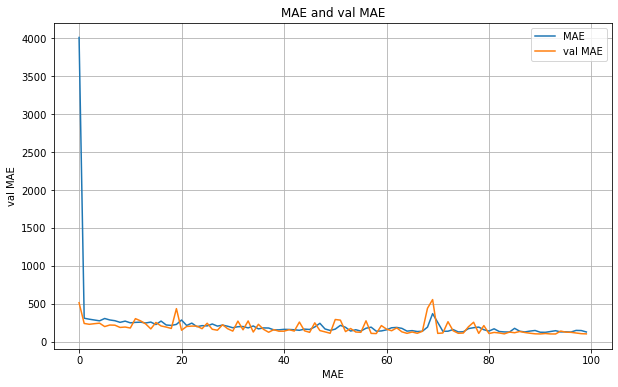

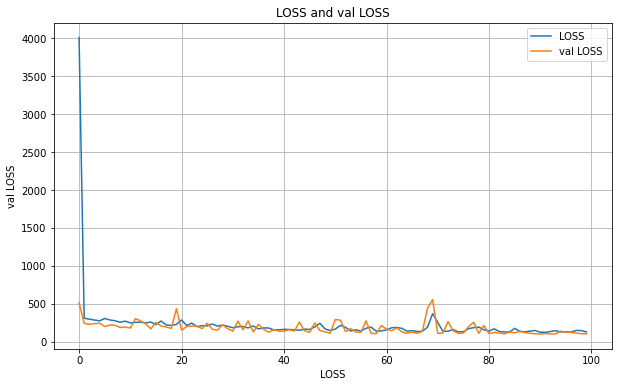

6/6 [==============================] - 0s 24ms/step


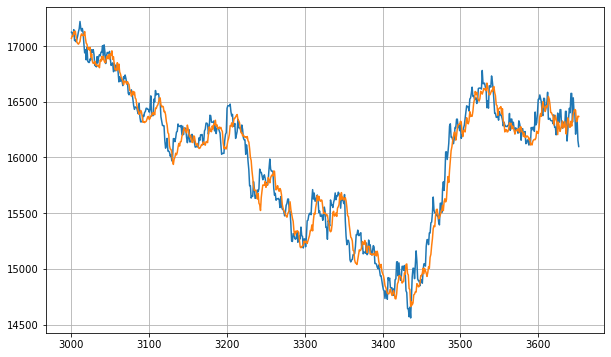

{'mae': 99.681595,
 'mse': 16797.33,
 'rmse': 129.6045,
 'mape': 0.62695795,
 'mase': 1.9261526}

In [11]:
# Load in best performing model
model_4 = tf.keras.models.load_model("model_experiments/model_4/")
model_4.evaluate(valid_set)

# Get mae and loss from history log
mae=history_4.history['mae']
val_mae=history_4.history['val_mae']
loss=history_4.history['loss']
val_loss=history_4.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_4 = model_forecast(model_4, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_4 = forecast_4.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_4))

eval_model_4 = evaluate_preds(y_true=x_valid,
                               y_pred=results_4)
eval_model_4

In [12]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(7)
], name="model_5")

# Get initial weights
init_weights = model_5.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_5.set_weights(init_weights)

model_5.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_5.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_5 = model_5.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_5.name)])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                992       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 2,455
Trainable params: 2,455
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 2s 20ms/step - loss: 13907.2471 - mae: 13907.7471

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 3s 66ms/step - loss: 13116.7080 - mae: 13117.2080 - val_loss: 9928.8828 - val_mae: 9929.3828
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 9502.2969 - mae: 9502.7959

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 9535.1641 - mae: 9535.6631 - val_loss: 9268.9951 - val_mae: 9269.4951
Epoch 3/100
15/24 [=================>............] - ETA: 0s - loss: 8717.5977 - mae: 8718.0977

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 55ms/step - loss: 8735.5889 - mae: 8736.0879 - val_loss: 8452.0820 - val_mae: 8452.5811
Epoch 4/100
16/24 [===================>..........] - ETA: 0s - loss: 8052.1152 - mae: 8052.6152

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 8086.8052 - mae: 8087.3057 - val_loss: 7903.6196 - val_mae: 7904.1196
Epoch 5/100
15/24 [=================>............] - ETA: 0s - loss: 7512.7612 - mae: 7513.2612

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 65ms/step - loss: 7542.7515 - mae: 7543.2510 - val_loss: 7344.5508 - val_mae: 7345.0508
Epoch 6/100
16/24 [===================>..........] - ETA: 0s - loss: 6964.1323 - mae: 6964.6323

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 55ms/step - loss: 6979.3252 - mae: 6979.8247 - val_loss: 6747.9463 - val_mae: 6748.4463
Epoch 7/100
16/24 [===================>..........] - ETA: 0s - loss: 6372.6270 - mae: 6373.1270

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 6362.6763 - mae: 6363.1758 - val_loss: 6080.4448 - val_mae: 6080.9448
Epoch 8/100
16/24 [===================>..........] - ETA: 0s - loss: 5700.3164 - mae: 5700.8164

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 5654.3911 - mae: 5654.8911 - val_loss: 5297.7383 - val_mae: 5298.2378
Epoch 9/100
15/24 [=================>............] - ETA: 0s - loss: 4888.2812 - mae: 4888.7812

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 4806.7808 - mae: 4807.2808 - val_loss: 4330.5386 - val_mae: 4331.0381
Epoch 10/100
15/24 [=================>............] - ETA: 0s - loss: 3927.8359 - mae: 3928.3354

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 3877.3777 - mae: 3877.8774 - val_loss: 3550.0220 - val_mae: 3550.5220
Epoch 11/100
15/24 [=================>............] - ETA: 0s - loss: 3326.8271 - mae: 3327.3267

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 3314.1936 - mae: 3314.6926 - val_loss: 3104.1895 - val_mae: 3104.6892
Epoch 12/100
16/24 [===================>..........] - ETA: 0s - loss: 2918.9473 - mae: 2919.4468

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 2894.2495 - mae: 2894.7493 - val_loss: 2688.0435 - val_mae: 2688.5420
Epoch 13/100
15/24 [=================>............] - ETA: 0s - loss: 2507.5483 - mae: 2508.0481

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 2474.1594 - mae: 2474.6589 - val_loss: 2239.9180 - val_mae: 2240.4172
Epoch 14/100
16/24 [===================>..........] - ETA: 0s - loss: 2067.9534 - mae: 2068.4531

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 66ms/step - loss: 2019.5559 - mae: 2020.0555 - val_loss: 1753.8207 - val_mae: 1754.3204
Epoch 15/100
17/24 [====================>.........] - ETA: 0s - loss: 1567.4717 - mae: 1567.9714

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 1513.8325 - mae: 1514.3322 - val_loss: 1206.3207 - val_mae: 1206.8199
Epoch 16/100
17/24 [====================>.........] - ETA: 0s - loss: 1066.8209 - mae: 1067.3206

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 1045.2517 - mae: 1045.7515 - val_loss: 878.5756 - val_mae: 879.0745
Epoch 17/100
15/24 [=================>............] - ETA: 0s - loss: 830.0473 - mae: 830.5469

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 790.9232 - mae: 791.4227 - val_loss: 615.8388 - val_mae: 616.3384
Epoch 18/100
15/24 [=================>............] - ETA: 0s - loss: 565.5629 - mae: 566.0625

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 522.7606 - mae: 523.2603 - val_loss: 354.4432 - val_mae: 354.9428
Epoch 19/100
15/24 [=================>............] - ETA: 0s - loss: 295.1737 - mae: 295.6733

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 254.4127 - mae: 254.9122 - val_loss: 176.0042 - val_mae: 176.5035
Epoch 20/100
15/24 [=================>............] - ETA: 0s - loss: 209.5415 - mae: 210.0410

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 204.2807 - mae: 204.7802 - val_loss: 138.7050 - val_mae: 139.2040
Epoch 21/100
15/24 [=================>............] - ETA: 0s - loss: 188.9078 - mae: 189.4073

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 185.7334 - mae: 186.2327 - val_loss: 136.7686 - val_mae: 137.2678
Epoch 22/100
24/24 [==============================] - 1s 19ms/step - loss: 179.9658 - mae: 180.4650 - val_loss: 137.3024 - val_mae: 137.8014
Epoch 23/100
15/24 [=================>............] - ETA: 0s - loss: 176.7854 - mae: 177.2851

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 66ms/step - loss: 180.7661 - mae: 181.2658 - val_loss: 132.0275 - val_mae: 132.5267
Epoch 24/100
24/24 [==============================] - 1s 19ms/step - loss: 177.5521 - mae: 178.0515 - val_loss: 143.6530 - val_mae: 144.1522
Epoch 25/100
24/24 [==============================] - 1s 19ms/step - loss: 169.4337 - mae: 169.9328 - val_loss: 157.4866 - val_mae: 157.9860
Epoch 26/100
24/24 [==============================] - 1s 19ms/step - loss: 181.7863 - mae: 182.2858 - val_loss: 173.1105 - val_mae: 173.6098
Epoch 27/100
24/24 [==============================] - 1s 19ms/step - loss: 201.1235 - mae: 201.6231 - val_loss: 264.1355 - val_mae: 264.6355
Epoch 28/100
15/24 [=================>............] - ETA: 0s - loss: 198.7060 - mae: 199.2056

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 191.2043 - mae: 191.7039 - val_loss: 130.7380 - val_mae: 131.2371
Epoch 29/100
24/24 [==============================] - 1s 19ms/step - loss: 162.6665 - mae: 163.1660 - val_loss: 134.4951 - val_mae: 134.9943
Epoch 30/100
16/24 [===================>..........] - ETA: 0s - loss: 160.9032 - mae: 161.4025

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 160.5646 - mae: 161.0639 - val_loss: 128.2491 - val_mae: 128.7467
Epoch 31/100
15/24 [=================>............] - ETA: 0s - loss: 170.5630 - mae: 171.0623

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 167.6127 - mae: 168.1120 - val_loss: 124.6097 - val_mae: 125.1088
Epoch 32/100
24/24 [==============================] - 1s 19ms/step - loss: 161.6433 - mae: 162.1426 - val_loss: 137.9834 - val_mae: 138.4829
Epoch 33/100
16/24 [===================>..........] - ETA: 0s - loss: 169.1984 - mae: 169.6979

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 164.7793 - mae: 165.2788 - val_loss: 121.8603 - val_mae: 122.3599
Epoch 34/100
16/24 [===================>..........] - ETA: 0s - loss: 156.3213 - mae: 156.8204

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 155.1718 - mae: 155.6706 - val_loss: 120.1161 - val_mae: 120.6150
Epoch 35/100
24/24 [==============================] - 1s 19ms/step - loss: 156.8850 - mae: 157.3843 - val_loss: 135.1098 - val_mae: 135.6093
Epoch 36/100
24/24 [==============================] - 1s 19ms/step - loss: 153.8742 - mae: 154.3738 - val_loss: 138.5680 - val_mae: 139.0675
Epoch 37/100
24/24 [==============================] - 1s 20ms/step - loss: 159.2012 - mae: 159.7002 - val_loss: 123.0368 - val_mae: 123.5359
Epoch 38/100
24/24 [==============================] - 1s 20ms/step - loss: 148.4129 - mae: 148.9119 - val_loss: 137.3944 - val_mae: 137.8938
Epoch 39/100
14/24 [================>.............] - ETA: 0s - loss: 160.2093 - mae: 160.7082

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 155.4161 - mae: 155.9152 - val_loss: 118.9270 - val_mae: 119.4257
Epoch 40/100
24/24 [==============================] - 1s 19ms/step - loss: 150.1988 - mae: 150.6983 - val_loss: 148.3994 - val_mae: 148.8984
Epoch 41/100
16/24 [===================>..........] - ETA: 0s - loss: 154.8081 - mae: 155.3075

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 150.3384 - mae: 150.8378 - val_loss: 116.4713 - val_mae: 116.9709
Epoch 42/100
15/24 [=================>............] - ETA: 0s - loss: 147.1206 - mae: 147.6198

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 66ms/step - loss: 145.3228 - mae: 145.8219 - val_loss: 112.1445 - val_mae: 112.6437
Epoch 43/100
15/24 [=================>............] - ETA: 0s - loss: 150.1577 - mae: 150.6563

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 146.4625 - mae: 146.9611 - val_loss: 110.2561 - val_mae: 110.7556
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 141.0791 - mae: 141.5778 - val_loss: 112.7100 - val_mae: 113.2089
Epoch 45/100
24/24 [==============================] - 1s 19ms/step - loss: 136.2556 - mae: 136.7545 - val_loss: 171.2219 - val_mae: 171.7217
Epoch 46/100
24/24 [==============================] - 1s 19ms/step - loss: 148.5523 - mae: 149.0515 - val_loss: 122.5567 - val_mae: 123.0557
Epoch 47/100
24/24 [==============================] - 1s 19ms/step - loss: 136.0934 - mae: 136.5929 - val_loss: 110.8117 - val_mae: 111.3106
Epoch 48/100
24/24 [==============================] - 1s 22ms/step - loss: 134.5266 - mae: 135.0263 - val_loss: 113.7049 - val_mae: 114.2036
Epoch 49/100
24/24 [==============================] - 1s 18ms/step - loss: 136.9258 - mae: 137.4250 - val_loss: 113.5714 - val_mae: 114.0696
Epoch 50/100
15/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 134.0501 - mae: 134.5491 - val_loss: 105.8254 - val_mae: 106.3239
Epoch 51/100
24/24 [==============================] - 1s 19ms/step - loss: 128.5686 - mae: 129.0674 - val_loss: 199.5691 - val_mae: 200.0689
Epoch 52/100
24/24 [==============================] - 1s 19ms/step - loss: 144.3935 - mae: 144.8928 - val_loss: 128.6999 - val_mae: 129.1991
Epoch 53/100
15/24 [=================>............] - ETA: 0s - loss: 134.4664 - mae: 134.9649

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 131.1788 - mae: 131.6777 - val_loss: 104.9703 - val_mae: 105.4694
Epoch 54/100
16/24 [===================>..........] - ETA: 0s - loss: 123.7062 - mae: 124.2055

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 127.5524 - mae: 128.0516 - val_loss: 102.1468 - val_mae: 102.6447
Epoch 55/100
16/24 [===================>..........] - ETA: 0s - loss: 135.0487 - mae: 135.5479

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 130.5634 - mae: 131.0627 - val_loss: 101.0249 - val_mae: 101.5223
Epoch 56/100
24/24 [==============================] - 1s 19ms/step - loss: 125.6992 - mae: 126.1986 - val_loss: 105.1273 - val_mae: 105.6269
Epoch 57/100
16/24 [===================>..........] - ETA: 0s - loss: 119.0480 - mae: 119.5467

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 119.8197 - mae: 120.3186 - val_loss: 98.6933 - val_mae: 99.1923
Epoch 58/100
24/24 [==============================] - 1s 18ms/step - loss: 118.4550 - mae: 118.9540 - val_loss: 106.5138 - val_mae: 107.0130
Epoch 59/100
24/24 [==============================] - 1s 19ms/step - loss: 125.6083 - mae: 126.1069 - val_loss: 152.8185 - val_mae: 153.3185
Epoch 60/100
16/24 [===================>..........] - ETA: 0s - loss: 143.9247 - mae: 144.4241

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 55ms/step - loss: 141.1875 - mae: 141.6868 - val_loss: 97.0117 - val_mae: 97.5117
Epoch 61/100
24/24 [==============================] - 1s 20ms/step - loss: 114.6994 - mae: 115.1986 - val_loss: 110.4230 - val_mae: 110.9225
Epoch 62/100
17/24 [====================>.........] - ETA: 0s - loss: 123.0048 - mae: 123.5034

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 67ms/step - loss: 122.8545 - mae: 123.3533 - val_loss: 95.9753 - val_mae: 96.4727
Epoch 63/100
24/24 [==============================] - 1s 19ms/step - loss: 120.4974 - mae: 120.9963 - val_loss: 98.0359 - val_mae: 98.5351
Epoch 64/100
14/24 [================>.............] - ETA: 0s - loss: 122.3559 - mae: 122.8553

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 117.5284 - mae: 118.0275 - val_loss: 95.8308 - val_mae: 96.3291
Epoch 65/100
24/24 [==============================] - 1s 18ms/step - loss: 119.0197 - mae: 119.5191 - val_loss: 121.3910 - val_mae: 121.8903
Epoch 66/100
15/24 [=================>............] - ETA: 0s - loss: 115.1608 - mae: 115.6600

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 115.6157 - mae: 116.1150 - val_loss: 94.1249 - val_mae: 94.6235
Epoch 67/100
15/24 [=================>............] - ETA: 0s - loss: 117.9150 - mae: 118.4140

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 119.2680 - mae: 119.7672 - val_loss: 93.8484 - val_mae: 94.3477
Epoch 68/100
24/24 [==============================] - 1s 19ms/step - loss: 124.0682 - mae: 124.5672 - val_loss: 100.2702 - val_mae: 100.7696
Epoch 69/100
24/24 [==============================] - 1s 21ms/step - loss: 111.7752 - mae: 112.2743 - val_loss: 100.4103 - val_mae: 100.9088
Epoch 70/100
24/24 [==============================] - 1s 20ms/step - loss: 111.9407 - mae: 112.4393 - val_loss: 142.7774 - val_mae: 143.2766
Epoch 71/100
24/24 [==============================] - 1s 19ms/step - loss: 139.2359 - mae: 139.7353 - val_loss: 166.9807 - val_mae: 167.4805
Epoch 72/100
24/24 [==============================] - 1s 19ms/step - loss: 127.2113 - mae: 127.7103 - val_loss: 110.3570 - val_mae: 110.8568
Epoch 73/100
15/24 [=================>............] - ETA: 0s - loss: 112.0525 - mae: 112.5514

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 58ms/step - loss: 111.3331 - mae: 111.8320 - val_loss: 92.3665 - val_mae: 92.8657
Epoch 74/100
24/24 [==============================] - 1s 19ms/step - loss: 113.2425 - mae: 113.7416 - val_loss: 100.2628 - val_mae: 100.7621
Epoch 75/100
15/24 [=================>............] - ETA: 0s - loss: 114.1981 - mae: 114.6969

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 56ms/step - loss: 109.9486 - mae: 110.4476 - val_loss: 92.1981 - val_mae: 92.6981
Epoch 76/100
24/24 [==============================] - 1s 18ms/step - loss: 109.8082 - mae: 110.3070 - val_loss: 97.5208 - val_mae: 98.0190
Epoch 77/100
20/24 [========================>.....] - ETA: 0s - loss: 108.8647 - mae: 109.3638

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 71ms/step - loss: 110.1775 - mae: 110.6767 - val_loss: 91.7241 - val_mae: 92.2227
Epoch 78/100
15/24 [=================>............] - ETA: 0s - loss: 115.8964 - mae: 116.3955

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 61ms/step - loss: 114.8904 - mae: 115.3897 - val_loss: 91.0684 - val_mae: 91.5678
Epoch 79/100
24/24 [==============================] - 1s 20ms/step - loss: 109.0419 - mae: 109.5413 - val_loss: 152.0364 - val_mae: 152.5362
Epoch 80/100
24/24 [==============================] - 1s 19ms/step - loss: 139.2858 - mae: 139.7853 - val_loss: 234.9482 - val_mae: 235.4481
Epoch 81/100
24/24 [==============================] - 1s 19ms/step - loss: 164.4751 - mae: 164.9747 - val_loss: 236.8250 - val_mae: 237.3247
Epoch 82/100
24/24 [==============================] - 1s 19ms/step - loss: 135.5554 - mae: 136.0546 - val_loss: 140.0156 - val_mae: 140.5149
Epoch 83/100
17/24 [====================>.........] - ETA: 0s - loss: 116.4767 - mae: 116.9755

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 2s 66ms/step - loss: 114.7176 - mae: 115.2163 - val_loss: 90.9471 - val_mae: 91.4460
Epoch 84/100
24/24 [==============================] - 1s 19ms/step - loss: 109.2258 - mae: 109.7249 - val_loss: 163.8305 - val_mae: 164.3296
Epoch 85/100
24/24 [==============================] - 1s 19ms/step - loss: 144.9600 - mae: 145.4594 - val_loss: 120.6316 - val_mae: 121.1308
Epoch 86/100
24/24 [==============================] - 1s 20ms/step - loss: 116.3152 - mae: 116.8144 - val_loss: 120.1128 - val_mae: 120.6125
Epoch 87/100
16/24 [===================>..........] - ETA: 0s - loss: 121.2570 - mae: 121.7562

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 55ms/step - loss: 119.4336 - mae: 119.9326 - val_loss: 90.5204 - val_mae: 91.0190
Epoch 88/100
24/24 [==============================] - 1s 19ms/step - loss: 114.1672 - mae: 114.6658 - val_loss: 90.5484 - val_mae: 91.0472
Epoch 89/100
24/24 [==============================] - 1s 19ms/step - loss: 114.6416 - mae: 115.1410 - val_loss: 162.6223 - val_mae: 163.1219
Epoch 90/100
24/24 [==============================] - 1s 19ms/step - loss: 137.7484 - mae: 138.2476 - val_loss: 133.4621 - val_mae: 133.9615
Epoch 91/100
24/24 [==============================] - 1s 19ms/step - loss: 114.4678 - mae: 114.9671 - val_loss: 96.7456 - val_mae: 97.2443
Epoch 92/100
24/24 [==============================] - 1s 19ms/step - loss: 109.2305 - mae: 109.7297 - val_loss: 91.3548 - val_mae: 91.8542
Epoch 93/100
24/24 [==============================] - 1s 19ms/step - loss: 107.9300 - mae: 108.4287 - val_loss: 95.2369 - val_mae: 95.7362
Epoch 94/100
24/24 [================

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 106.2585 - mae: 106.7577 - val_loss: 89.6060 - val_mae: 90.1049
Epoch 99/100
15/24 [=================>............] - ETA: 0s - loss: 110.1498 - mae: 110.6488

INFO:tensorflow:Assets written to: model_experiments\model_5\assets


INFO:tensorflow:Assets written to: model_experiments\model_5\assets


24/24 [==============================] - 1s 57ms/step - loss: 110.6270 - mae: 111.1260 - val_loss: 89.1707 - val_mae: 89.6701
Epoch 100/100
24/24 [==============================] - 1s 20ms/step - loss: 105.9895 - mae: 106.4876 - val_loss: 143.9236 - val_mae: 144.4231


5/5 [==============================] - 0s 11ms/step - loss: 89.1707 - mae: 89.6701


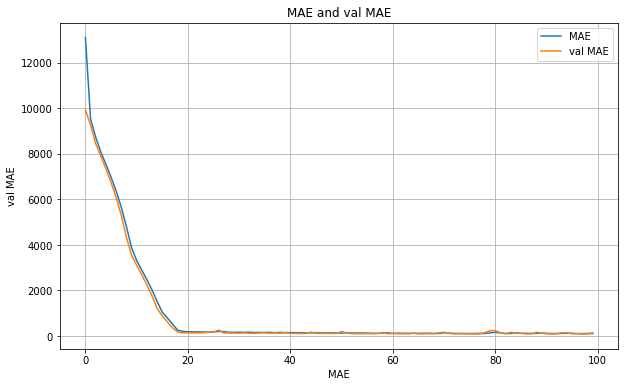

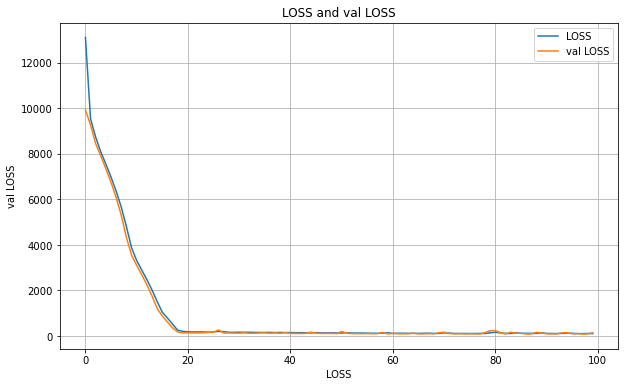

6/6 [==============================] - 0s 24ms/step


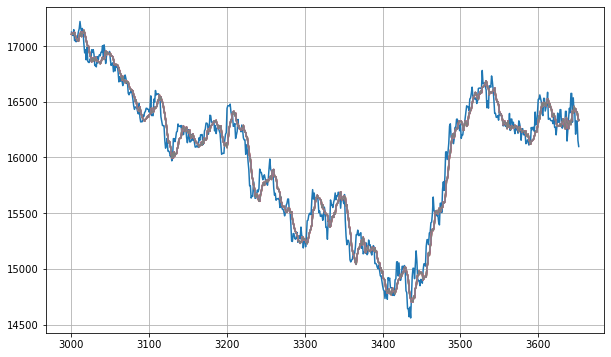

{'mae': 88.66139,
 'mse': 12946.59,
 'rmse': 88.661835,
 'mape': 0.5580856,
 'mase': 1.7132086}

In [13]:
# Load in best performing model
model_5 = tf.keras.models.load_model("model_experiments/model_5/")
model_5.evaluate(valid_set)

# Get mae and loss from history log
mae=history_5.history['mae']
val_mae=history_5.history['val_mae']
loss=history_5.history['loss']
val_loss=history_5.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_5 = model_forecast(model_5, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_5 = forecast_5.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_5))

# Reshape the array to the desired format
repeated_arr = np.repeat(x_valid, 7)
x_valid_h = repeated_arr.reshape((653, 7)).astype(np.float32)

eval_model_5 = evaluate_predss(y_true=x_valid_h,
                               y_pred=results_5)
eval_model_5

In [14]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
    tf.keras.layers.Dense(1)
], name="model_6")

# Get initial weights
init_weights = model_6.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_6.set_weights(init_weights)

model_6.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_6.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_6 = model_6.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_6.name)])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 64)            256       
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 1s 24ms/step - loss: 11092.0674 - mae: 11092.5674

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 61ms/step - loss: 10016.3789 - mae: 10016.8779 - val_loss: 5804.2959 - val_mae: 5804.7959
Epoch 2/100
19/24 [======================>.......] - ETA: 0s - loss: 2621.7024 - mae: 2622.2024

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 51ms/step - loss: 2315.0813 - mae: 2315.5813 - val_loss: 1032.2490 - val_mae: 1032.7490
Epoch 3/100
16/24 [===================>..........] - ETA: 0s - loss: 506.2836 - mae: 506.7836

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 62ms/step - loss: 433.7240 - mae: 434.2238 - val_loss: 261.4706 - val_mae: 261.9706
Epoch 4/100
15/24 [=================>............] - ETA: 0s - loss: 268.5441 - mae: 269.0439

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 50ms/step - loss: 260.7156 - mae: 261.2153 - val_loss: 191.4347 - val_mae: 191.9336
Epoch 5/100
16/24 [===================>..........] - ETA: 0s - loss: 246.0210 - mae: 246.5204

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 50ms/step - loss: 239.3739 - mae: 239.8735 - val_loss: 184.2599 - val_mae: 184.7599
Epoch 6/100
21/24 [=========================>....] - ETA: 0s - loss: 235.7130 - mae: 236.2128

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 54ms/step - loss: 235.4297 - mae: 235.9295 - val_loss: 181.9980 - val_mae: 182.4966
Epoch 7/100
15/24 [=================>............] - ETA: 0s - loss: 244.1995 - mae: 244.6990

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 52ms/step - loss: 237.1915 - mae: 237.6908 - val_loss: 180.0494 - val_mae: 180.5478
Epoch 8/100
17/24 [====================>.........] - ETA: 0s - loss: 234.8921 - mae: 235.3918

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 235.0960 - mae: 235.5955 - val_loss: 175.6453 - val_mae: 176.1445
Epoch 9/100
24/24 [==============================] - 1s 19ms/step - loss: 235.6147 - mae: 236.1139 - val_loss: 181.7223 - val_mae: 182.2206
Epoch 10/100
24/24 [==============================] - 1s 19ms/step - loss: 236.2010 - mae: 236.7007 - val_loss: 184.3254 - val_mae: 184.8249
Epoch 11/100
24/24 [==============================] - 1s 19ms/step - loss: 238.5967 - mae: 239.0964 - val_loss: 188.2229 - val_mae: 188.7217
Epoch 12/100
24/24 [==============================] - 1s 19ms/step - loss: 236.4479 - mae: 236.9474 - val_loss: 179.1422 - val_mae: 179.6416
Epoch 13/100
24/24 [==============================] - 1s 19ms/step - loss: 241.1297 - mae: 241.6295 - val_loss: 182.4329 - val_mae: 182.9312
Epoch 14/100
24/24 [==============================] - 1s 19ms/step - loss: 239.3514 - mae: 239.8510 - val_loss: 179.7789 - val_mae: 180.2788
Epoch 15/100
19/24 [=======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 240.9852 - mae: 241.4845 - val_loss: 174.6659 - val_mae: 175.1654
Epoch 16/100
24/24 [==============================] - 1s 19ms/step - loss: 237.4447 - mae: 237.9441 - val_loss: 185.1838 - val_mae: 185.6837
Epoch 17/100
24/24 [==============================] - 1s 19ms/step - loss: 240.0651 - mae: 240.5649 - val_loss: 174.9037 - val_mae: 175.4037
Epoch 18/100
15/24 [=================>............] - ETA: 0s - loss: 239.9093 - mae: 240.4085

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 238.0180 - mae: 238.5173 - val_loss: 173.9772 - val_mae: 174.4757
Epoch 19/100
24/24 [==============================] - 1s 20ms/step - loss: 241.1294 - mae: 241.6285 - val_loss: 177.2843 - val_mae: 177.7829
Epoch 20/100
24/24 [==============================] - 1s 20ms/step - loss: 234.3174 - mae: 234.8170 - val_loss: 174.9803 - val_mae: 175.4800
Epoch 21/100
24/24 [==============================] - 1s 20ms/step - loss: 234.8310 - mae: 235.3307 - val_loss: 181.8699 - val_mae: 182.3693
Epoch 22/100
24/24 [==============================] - 1s 19ms/step - loss: 234.6978 - mae: 235.1976 - val_loss: 178.8559 - val_mae: 179.3551
Epoch 23/100
24/24 [==============================] - 1s 19ms/step - loss: 235.7442 - mae: 236.2436 - val_loss: 186.0354 - val_mae: 186.5354
Epoch 24/100
24/24 [==============================] - 1s 19ms/step - loss: 233.3977 - mae: 233.8970 - val_loss: 188.9142 - val_mae: 189.4133
Epoch 25/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 238.8145 - mae: 239.3139 - val_loss: 172.8257 - val_mae: 173.3251
Epoch 27/100
20/24 [========================>.....] - ETA: 0s - loss: 240.2926 - mae: 240.7920

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 236.7159 - mae: 237.2154 - val_loss: 172.4396 - val_mae: 172.9395
Epoch 28/100
24/24 [==============================] - 1s 18ms/step - loss: 233.6298 - mae: 234.1294 - val_loss: 178.4113 - val_mae: 178.9109
Epoch 29/100
24/24 [==============================] - 1s 19ms/step - loss: 232.9660 - mae: 233.4654 - val_loss: 173.1859 - val_mae: 173.6853
Epoch 30/100
19/24 [======================>.......] - ETA: 0s - loss: 238.9525 - mae: 239.4521

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 236.3533 - mae: 236.8528 - val_loss: 171.4960 - val_mae: 171.9942
Epoch 31/100
24/24 [==============================] - 1s 19ms/step - loss: 238.6232 - mae: 239.1225 - val_loss: 177.8848 - val_mae: 178.3845
Epoch 32/100
24/24 [==============================] - 1s 20ms/step - loss: 228.7251 - mae: 229.2241 - val_loss: 193.8142 - val_mae: 194.3138
Epoch 33/100
24/24 [==============================] - 1s 19ms/step - loss: 237.5654 - mae: 238.0648 - val_loss: 180.4934 - val_mae: 180.9931
Epoch 34/100
24/24 [==============================] - 1s 20ms/step - loss: 231.3752 - mae: 231.8744 - val_loss: 172.5264 - val_mae: 173.0257
Epoch 35/100
21/24 [=========================>....] - ETA: 0s - loss: 229.1968 - mae: 229.6967

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 230.2942 - mae: 230.7941 - val_loss: 171.1674 - val_mae: 171.6672
Epoch 36/100
24/24 [==============================] - 1s 19ms/step - loss: 228.9012 - mae: 229.4004 - val_loss: 189.0614 - val_mae: 189.5605
Epoch 37/100
19/24 [======================>.......] - ETA: 0s - loss: 239.4573 - mae: 239.9570

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 58ms/step - loss: 237.2739 - mae: 237.7736 - val_loss: 170.9872 - val_mae: 171.4872
Epoch 38/100
22/24 [==========================>...] - ETA: 0s - loss: 233.4388 - mae: 233.9382

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 232.0021 - mae: 232.5016 - val_loss: 170.5612 - val_mae: 171.0606
Epoch 39/100
20/24 [========================>.....] - ETA: 0s - loss: 224.9754 - mae: 225.4749

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 227.9514 - mae: 228.4509 - val_loss: 170.0244 - val_mae: 170.5236
Epoch 40/100
15/24 [=================>............] - ETA: 0s - loss: 230.0818 - mae: 230.5812

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 229.9023 - mae: 230.4019 - val_loss: 169.9189 - val_mae: 170.4182
Epoch 41/100
24/24 [==============================] - 1s 21ms/step - loss: 228.0808 - mae: 228.5803 - val_loss: 170.0318 - val_mae: 170.5308
Epoch 42/100
24/24 [==============================] - 1s 19ms/step - loss: 227.0618 - mae: 227.5612 - val_loss: 185.3339 - val_mae: 185.8334
Epoch 43/100
24/24 [==============================] - 1s 18ms/step - loss: 232.2800 - mae: 232.7796 - val_loss: 170.2840 - val_mae: 170.7840
Epoch 44/100
24/24 [==============================] - 1s 19ms/step - loss: 225.3168 - mae: 225.8162 - val_loss: 176.3985 - val_mae: 176.8982
Epoch 45/100
15/24 [=================>............] - ETA: 0s - loss: 235.4090 - mae: 235.9090

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 228.8749 - mae: 229.3749 - val_loss: 168.4667 - val_mae: 168.9663
Epoch 46/100
24/24 [==============================] - 1s 19ms/step - loss: 232.8325 - mae: 233.3321 - val_loss: 175.9323 - val_mae: 176.4319
Epoch 47/100
24/24 [==============================] - 1s 19ms/step - loss: 228.4309 - mae: 228.9300 - val_loss: 169.7579 - val_mae: 170.2570
Epoch 48/100
16/24 [===================>..........] - ETA: 0s - loss: 226.5830 - mae: 227.0821

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 226.0027 - mae: 226.5021 - val_loss: 168.2792 - val_mae: 168.7782
Epoch 49/100
24/24 [==============================] - 1s 20ms/step - loss: 224.6712 - mae: 225.1701 - val_loss: 178.2106 - val_mae: 178.7091
Epoch 50/100
24/24 [==============================] - 1s 19ms/step - loss: 229.1050 - mae: 229.6041 - val_loss: 172.2748 - val_mae: 172.7737
Epoch 51/100
15/24 [=================>............] - ETA: 0s - loss: 228.1752 - mae: 228.6751

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 50ms/step - loss: 226.3798 - mae: 226.8796 - val_loss: 167.9031 - val_mae: 168.4031
Epoch 52/100
24/24 [==============================] - 1s 20ms/step - loss: 230.1460 - mae: 230.6453 - val_loss: 169.8007 - val_mae: 170.3007
Epoch 53/100
24/24 [==============================] - 1s 20ms/step - loss: 223.0788 - mae: 223.5782 - val_loss: 168.8833 - val_mae: 169.3830
Epoch 54/100
24/24 [==============================] - 1s 20ms/step - loss: 224.3118 - mae: 224.8111 - val_loss: 182.6353 - val_mae: 183.1346
Epoch 55/100
20/24 [========================>.....] - ETA: 0s - loss: 224.5016 - mae: 225.0013

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 223.1305 - mae: 223.6303 - val_loss: 167.4978 - val_mae: 167.9978
Epoch 56/100
15/24 [=================>............] - ETA: 0s - loss: 229.8896 - mae: 230.3894

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 223.3362 - mae: 223.8358 - val_loss: 165.9777 - val_mae: 166.4774
Epoch 57/100
23/24 [===========================>..] - ETA: 0s - loss: 224.1351 - mae: 224.6343

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 223.8596 - mae: 224.3588 - val_loss: 165.8022 - val_mae: 166.3007
Epoch 58/100
24/24 [==============================] - 1s 20ms/step - loss: 223.9018 - mae: 224.4013 - val_loss: 173.8488 - val_mae: 174.3481
Epoch 59/100
24/24 [==============================] - 1s 20ms/step - loss: 233.6422 - mae: 234.1419 - val_loss: 174.5670 - val_mae: 175.0664
Epoch 60/100
24/24 [==============================] - 1s 20ms/step - loss: 223.1230 - mae: 223.6225 - val_loss: 166.0888 - val_mae: 166.5888
Epoch 61/100
23/24 [===========================>..] - ETA: 0s - loss: 222.2790 - mae: 222.7781

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 222.0412 - mae: 222.5403 - val_loss: 165.6007 - val_mae: 166.1004
Epoch 62/100
24/24 [==============================] - 1s 20ms/step - loss: 228.7532 - mae: 229.2530 - val_loss: 176.3164 - val_mae: 176.8162
Epoch 63/100
24/24 [==============================] - 1s 20ms/step - loss: 228.5252 - mae: 229.0247 - val_loss: 172.2259 - val_mae: 172.7241
Epoch 64/100
22/24 [==========================>...] - ETA: 0s - loss: 222.3269 - mae: 222.8262

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 221.0408 - mae: 221.5401 - val_loss: 164.7907 - val_mae: 165.2899
Epoch 65/100
24/24 [==============================] - 1s 20ms/step - loss: 219.8976 - mae: 220.3969 - val_loss: 172.3276 - val_mae: 172.8268
Epoch 66/100
24/24 [==============================] - 1s 20ms/step - loss: 230.3767 - mae: 230.8760 - val_loss: 165.0599 - val_mae: 165.5594
Epoch 67/100
24/24 [==============================] - 1s 20ms/step - loss: 223.3767 - mae: 223.8758 - val_loss: 166.5422 - val_mae: 167.0421
Epoch 68/100
19/24 [======================>.......] - ETA: 0s - loss: 225.9952 - mae: 226.4950

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 2s 58ms/step - loss: 225.0099 - mae: 225.5096 - val_loss: 163.6063 - val_mae: 164.1053
Epoch 69/100
24/24 [==============================] - 1s 21ms/step - loss: 221.5397 - mae: 222.0388 - val_loss: 172.6314 - val_mae: 173.1304
Epoch 70/100
24/24 [==============================] - 1s 20ms/step - loss: 217.0971 - mae: 217.5964 - val_loss: 163.6521 - val_mae: 164.1516
Epoch 71/100
24/24 [==============================] - 1s 19ms/step - loss: 224.7901 - mae: 225.2899 - val_loss: 167.0504 - val_mae: 167.5504
Epoch 72/100
24/24 [==============================] - 1s 20ms/step - loss: 229.9427 - mae: 230.4422 - val_loss: 168.4015 - val_mae: 168.9015
Epoch 73/100
24/24 [==============================] - 1s 19ms/step - loss: 222.6581 - mae: 223.1572 - val_loss: 164.4730 - val_mae: 164.9729
Epoch 74/100
24/24 [==============================] - 1s 19ms/step - loss: 230.9465 - mae: 231.4462 - val_loss: 184.6953 - val_mae: 185.1936
Epoch 75/100
14/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 215.6457 - mae: 216.1454 - val_loss: 162.9475 - val_mae: 163.4475
Epoch 76/100
24/24 [==============================] - 1s 19ms/step - loss: 218.8903 - mae: 219.3896 - val_loss: 165.6566 - val_mae: 166.1562
Epoch 77/100
24/24 [==============================] - 1s 20ms/step - loss: 219.9280 - mae: 220.4274 - val_loss: 163.5031 - val_mae: 164.0024
Epoch 78/100
24/24 [==============================] - 1s 20ms/step - loss: 220.5173 - mae: 221.0171 - val_loss: 178.6079 - val_mae: 179.1078
Epoch 79/100
24/24 [==============================] - 1s 19ms/step - loss: 243.3653 - mae: 243.8648 - val_loss: 176.8296 - val_mae: 177.3296
Epoch 80/100
16/24 [===================>..........] - ETA: 0s - loss: 215.7890 - mae: 216.2887

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 214.2977 - mae: 214.7973 - val_loss: 161.2529 - val_mae: 161.7528
Epoch 81/100
24/24 [==============================] - 1s 19ms/step - loss: 217.2687 - mae: 217.7683 - val_loss: 167.1889 - val_mae: 167.6867
Epoch 82/100
15/24 [=================>............] - ETA: 0s - loss: 216.1175 - mae: 216.6162

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 219.3741 - mae: 219.8731 - val_loss: 160.8630 - val_mae: 161.3627
Epoch 83/100
24/24 [==============================] - 1s 20ms/step - loss: 219.1168 - mae: 219.6162 - val_loss: 161.1747 - val_mae: 161.6741
Epoch 84/100
24/24 [==============================] - 1s 20ms/step - loss: 217.0329 - mae: 217.5320 - val_loss: 161.4910 - val_mae: 161.9906
Epoch 85/100
24/24 [==============================] - 1s 20ms/step - loss: 213.2075 - mae: 213.7072 - val_loss: 163.2682 - val_mae: 163.7682
Epoch 86/100
15/24 [=================>............] - ETA: 0s - loss: 222.0210 - mae: 222.5203

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 48ms/step - loss: 217.7651 - mae: 218.2643 - val_loss: 160.1257 - val_mae: 160.6248
Epoch 87/100
24/24 [==============================] - 1s 20ms/step - loss: 218.7966 - mae: 219.2961 - val_loss: 170.9603 - val_mae: 171.4598
Epoch 88/100
24/24 [==============================] - 1s 20ms/step - loss: 218.6210 - mae: 219.1205 - val_loss: 173.1975 - val_mae: 173.6965
Epoch 89/100
24/24 [==============================] - 1s 19ms/step - loss: 218.7385 - mae: 219.2379 - val_loss: 160.9983 - val_mae: 161.4983
Epoch 90/100
24/24 [==============================] - 1s 20ms/step - loss: 216.1437 - mae: 216.6425 - val_loss: 163.3514 - val_mae: 163.8514
Epoch 91/100
24/24 [==============================] - 1s 20ms/step - loss: 216.2624 - mae: 216.7617 - val_loss: 161.1604 - val_mae: 161.6601
Epoch 92/100
15/24 [=================>............] - ETA: 0s - loss: 217.0027 - mae: 217.5018

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 213.3919 - mae: 213.8913 - val_loss: 159.0324 - val_mae: 159.5316
Epoch 93/100
16/24 [===================>..........] - ETA: 0s - loss: 218.3146 - mae: 218.8136

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 47ms/step - loss: 212.8633 - mae: 213.3624 - val_loss: 158.8860 - val_mae: 159.3841
Epoch 94/100
24/24 [==============================] - 1s 20ms/step - loss: 214.4266 - mae: 214.9259 - val_loss: 159.8739 - val_mae: 160.3737
Epoch 95/100
24/24 [==============================] - 1s 20ms/step - loss: 223.7549 - mae: 224.2538 - val_loss: 177.7803 - val_mae: 178.2803
Epoch 96/100
24/24 [==============================] - 1s 19ms/step - loss: 229.4362 - mae: 229.9360 - val_loss: 160.9645 - val_mae: 161.4644
Epoch 97/100
24/24 [==============================] - 1s 19ms/step - loss: 217.6449 - mae: 218.1443 - val_loss: 159.8210 - val_mae: 160.3210
Epoch 98/100
24/24 [==============================] - 1s 19ms/step - loss: 217.8189 - mae: 218.3185 - val_loss: 160.3907 - val_mae: 160.8897
Epoch 99/100
18/24 [=====================>........] - ETA: 0s - loss: 217.9756 - mae: 218.4753

INFO:tensorflow:Assets written to: model_experiments\model_6\assets


INFO:tensorflow:Assets written to: model_experiments\model_6\assets


24/24 [==============================] - 1s 49ms/step - loss: 212.9187 - mae: 213.4182 - val_loss: 158.3992 - val_mae: 158.8977
Epoch 100/100
24/24 [==============================] - 1s 19ms/step - loss: 216.6224 - mae: 217.1219 - val_loss: 161.2036 - val_mae: 161.7020


5/5 [==============================] - 0s 8ms/step - loss: 158.3992 - mae: 158.8977


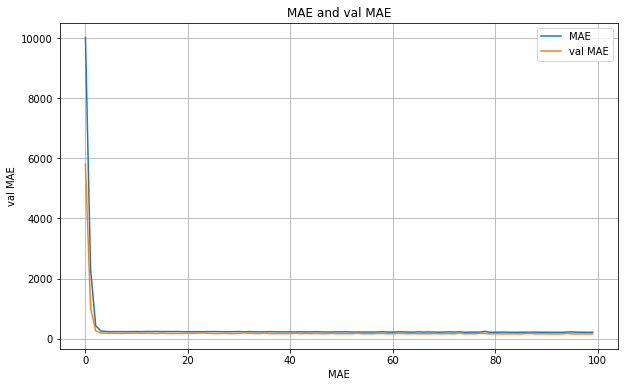

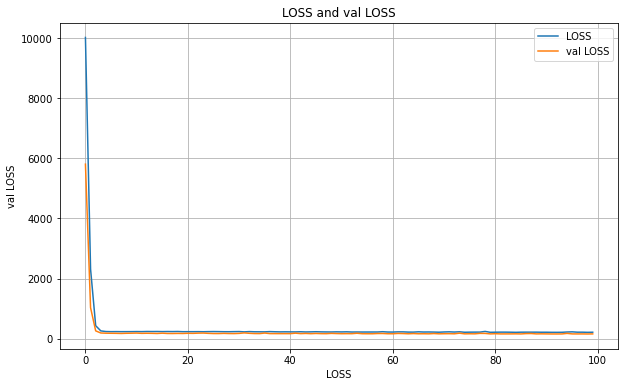

6/6 [==============================] - 0s 19ms/step


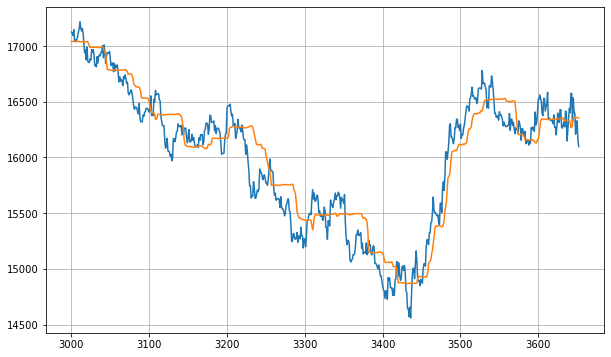

{'mae': 155.3847,
 'mse': 36813.008,
 'rmse': 191.86716,
 'mape': 0.97906834,
 'mase': 3.0025067}

In [15]:
# Load in best performing model
model_6 = tf.keras.models.load_model("model_experiments/model_6/")
model_6.evaluate(valid_set)

# Get mae and loss from history log
mae=history_6.history['mae']
val_mae=history_6.history['val_mae']
loss=history_6.history['loss']
val_loss=history_6.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_6 = model_forecast(model_6, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_6 = forecast_6.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_6))

eval_model_6 = evaluate_preds(y_true=x_valid,
                               y_pred=results_6)
eval_model_6

In [16]:
modeld_7 = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=512, kernel_size=3,
                      strides=1,
                      activation="relu",
                      padding='causal',
                      input_shape=[window_size, 1]),
  tf.keras.layers.GlobalMaxPooling1D(),  # Add a GlobalMaxPooling1D layer
  tf.keras.layers.Dense(1)
], name="modeld_7")

# Get initial weights
init_weights = modeld_7.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
modeld_7.set_weights(init_weights)

modeld_7.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
modeld_7.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_7 = modeld_7.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=modeld_7.name)])

Model: "modeld_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 512)           2048      
                                                                 
 global_max_pooling1d (Globa  (None, 512)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 513       
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     24/Unknown - 2s 28ms/step - loss: 6270.3076 - mae: 6270.8076

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 3s 75ms/step - loss: 6270.3076 - mae: 6270.8076 - val_loss: 1951.2462 - val_mae: 1951.7462
Epoch 2/100
21/24 [=========================>....] - ETA: 0s - loss: 736.2444 - mae: 736.7443

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 78ms/step - loss: 693.6158 - mae: 694.1157 - val_loss: 338.6434 - val_mae: 339.1434
Epoch 3/100
22/24 [==========================>...] - ETA: 0s - loss: 289.1258 - mae: 289.6253

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 286.2792 - mae: 286.7787 - val_loss: 217.0970 - val_mae: 217.5970
Epoch 4/100
22/24 [==========================>...] - ETA: 0s - loss: 262.4646 - mae: 262.9641

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 261.9608 - mae: 262.4603 - val_loss: 188.9210 - val_mae: 189.4206
Epoch 5/100
24/24 [==============================] - 1s 35ms/step - loss: 265.2599 - mae: 265.7595 - val_loss: 192.8710 - val_mae: 193.3707
Epoch 6/100
24/24 [==============================] - 1s 34ms/step - loss: 255.0904 - mae: 255.5899 - val_loss: 209.2344 - val_mae: 209.7338
Epoch 7/100
24/24 [==============================] - 1s 34ms/step - loss: 258.5475 - mae: 259.0471 - val_loss: 196.4234 - val_mae: 196.9232
Epoch 8/100
24/24 [==============================] - 1s 33ms/step - loss: 256.9508 - mae: 257.4505 - val_loss: 193.6391 - val_mae: 194.1378
Epoch 9/100
24/24 [==============================] - 1s 34ms/step - loss: 251.6540 - mae: 252.1531 - val_loss: 194.8634 - val_mae: 195.3628
Epoch 10/100
24/24 [==============================] - 1s 36ms/step - loss: 254.7073 - mae: 255.2070 - val_loss: 195.8912 - val_mae: 196.3905
Epoch 11/100
24/24 [===========

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 67ms/step - loss: 252.6113 - mae: 253.1107 - val_loss: 184.8786 - val_mae: 185.3776
Epoch 16/100
21/24 [=========================>....] - ETA: 0s - loss: 247.0620 - mae: 247.5614

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 66ms/step - loss: 249.3622 - mae: 249.8617 - val_loss: 181.6704 - val_mae: 182.1696
Epoch 17/100
21/24 [=========================>....] - ETA: 0s - loss: 249.2444 - mae: 249.7440

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 61ms/step - loss: 247.1024 - mae: 247.6021 - val_loss: 180.9164 - val_mae: 181.4160
Epoch 18/100
24/24 [==============================] - 1s 35ms/step - loss: 245.5183 - mae: 246.0178 - val_loss: 182.3381 - val_mae: 182.8371
Epoch 19/100
24/24 [==============================] - 1s 35ms/step - loss: 242.3339 - mae: 242.8335 - val_loss: 182.9322 - val_mae: 183.4309
Epoch 20/100
21/24 [=========================>....] - ETA: 0s - loss: 247.3776 - mae: 247.8771

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 244.3811 - mae: 244.8807 - val_loss: 179.1362 - val_mae: 179.6346
Epoch 21/100
24/24 [==============================] - 1s 34ms/step - loss: 256.6645 - mae: 257.1641 - val_loss: 184.0360 - val_mae: 184.5354
Epoch 22/100
24/24 [==============================] - ETA: 0s - loss: 240.2200 - mae: 240.7196

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 240.2200 - mae: 240.7196 - val_loss: 178.5639 - val_mae: 179.0627
Epoch 23/100
21/24 [=========================>....] - ETA: 0s - loss: 238.0372 - mae: 238.5370

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 238.3298 - mae: 238.8297 - val_loss: 177.5781 - val_mae: 178.0770
Epoch 24/100
24/24 [==============================] - 1s 35ms/step - loss: 236.9075 - mae: 237.4070 - val_loss: 183.9975 - val_mae: 184.4975
Epoch 25/100
21/24 [=========================>....] - ETA: 0s - loss: 237.0709 - mae: 237.5707

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 235.4201 - mae: 235.9197 - val_loss: 175.6741 - val_mae: 176.1741
Epoch 26/100
24/24 [==============================] - 1s 36ms/step - loss: 236.4482 - mae: 236.9477 - val_loss: 177.0672 - val_mae: 177.5669
Epoch 27/100
24/24 [==============================] - 1s 34ms/step - loss: 233.7250 - mae: 234.2249 - val_loss: 196.7596 - val_mae: 197.2593
Epoch 28/100
21/24 [=========================>....] - ETA: 0s - loss: 234.5371 - mae: 235.0363

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 233.6777 - mae: 234.1769 - val_loss: 174.7213 - val_mae: 175.2204
Epoch 29/100
21/24 [=========================>....] - ETA: 0s - loss: 234.3469 - mae: 234.8458

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 233.4550 - mae: 233.9540 - val_loss: 174.4113 - val_mae: 174.9104
Epoch 30/100
24/24 [==============================] - 1s 35ms/step - loss: 229.0192 - mae: 229.5185 - val_loss: 174.9910 - val_mae: 175.4910
Epoch 31/100
21/24 [=========================>....] - ETA: 0s - loss: 237.8890 - mae: 238.3887

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 73ms/step - loss: 237.7509 - mae: 238.2505 - val_loss: 171.5556 - val_mae: 172.0556
Epoch 32/100
24/24 [==============================] - 1s 35ms/step - loss: 227.2246 - mae: 227.7241 - val_loss: 230.7019 - val_mae: 231.2001
Epoch 33/100
24/24 [==============================] - 1s 35ms/step - loss: 246.4410 - mae: 246.9405 - val_loss: 195.0471 - val_mae: 195.5471
Epoch 34/100
24/24 [==============================] - 1s 35ms/step - loss: 237.7478 - mae: 238.2466 - val_loss: 199.6337 - val_mae: 200.1323
Epoch 35/100
24/24 [==============================] - 1s 34ms/step - loss: 238.5369 - mae: 239.0366 - val_loss: 199.3733 - val_mae: 199.8731
Epoch 36/100
21/24 [=========================>....] - ETA: 0s - loss: 236.9746 - mae: 237.4739

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 235.7411 - mae: 236.2404 - val_loss: 167.7311 - val_mae: 168.2300
Epoch 37/100
24/24 [==============================] - 1s 35ms/step - loss: 223.8643 - mae: 224.3640 - val_loss: 186.9725 - val_mae: 187.4725
Epoch 38/100
24/24 [==============================] - 1s 34ms/step - loss: 235.0460 - mae: 235.5457 - val_loss: 175.0038 - val_mae: 175.5028
Epoch 39/100
23/24 [===========================>..] - ETA: 0s - loss: 225.4309 - mae: 225.9301

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 225.1350 - mae: 225.6342 - val_loss: 165.9503 - val_mae: 166.4496
Epoch 40/100
24/24 [==============================] - 1s 35ms/step - loss: 233.2043 - mae: 233.7038 - val_loss: 233.8408 - val_mae: 234.3408
Epoch 41/100
24/24 [==============================] - 1s 35ms/step - loss: 241.1031 - mae: 241.6022 - val_loss: 175.2147 - val_mae: 175.7139
Epoch 42/100
24/24 [==============================] - 1s 35ms/step - loss: 227.6086 - mae: 228.1081 - val_loss: 204.4912 - val_mae: 204.9910
Epoch 43/100
24/24 [==============================] - 1s 35ms/step - loss: 231.9981 - mae: 232.4977 - val_loss: 175.6602 - val_mae: 176.1585
Epoch 44/100
24/24 [==============================] - 1s 35ms/step - loss: 225.4219 - mae: 225.9216 - val_loss: 179.3923 - val_mae: 179.8913
Epoch 45/100
24/24 [==============================] - 1s 36ms/step - loss: 231.8668 - mae: 232.3664 - val_loss: 205.5126 - val_mae: 206.0117
Epoch 46/100
23/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 63ms/step - loss: 218.2795 - mae: 218.7791 - val_loss: 162.4820 - val_mae: 162.9819
Epoch 47/100
24/24 [==============================] - 1s 36ms/step - loss: 219.0464 - mae: 219.5458 - val_loss: 169.0995 - val_mae: 169.5990
Epoch 48/100
24/24 [==============================] - 1s 35ms/step - loss: 218.8778 - mae: 219.3774 - val_loss: 190.4891 - val_mae: 190.9891
Epoch 49/100
24/24 [==============================] - 1s 35ms/step - loss: 221.8438 - mae: 222.3435 - val_loss: 164.6861 - val_mae: 165.1856
Epoch 50/100
24/24 [==============================] - 1s 36ms/step - loss: 211.8666 - mae: 212.3663 - val_loss: 163.0452 - val_mae: 163.5448
Epoch 51/100
24/24 [==============================] - 1s 36ms/step - loss: 215.4691 - mae: 215.9685 - val_loss: 185.9927 - val_mae: 186.4919
Epoch 52/100
24/24 [==============================] - 1s 37ms/step - loss: 213.6962 - mae: 214.1953 - val_loss: 192.0267 - val_mae: 192.5267
Epoch 53/100
21/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 212.6676 - mae: 213.1671 - val_loss: 158.5307 - val_mae: 159.0298
Epoch 54/100
24/24 [==============================] - 1s 34ms/step - loss: 221.4550 - mae: 221.9548 - val_loss: 159.9463 - val_mae: 160.4463
Epoch 55/100
24/24 [==============================] - 1s 35ms/step - loss: 219.0631 - mae: 219.5620 - val_loss: 191.5094 - val_mae: 192.0089
Epoch 56/100
24/24 [==============================] - 1s 38ms/step - loss: 229.9391 - mae: 230.4386 - val_loss: 213.1800 - val_mae: 213.6785
Epoch 57/100
24/24 [==============================] - 1s 35ms/step - loss: 244.6763 - mae: 245.1759 - val_loss: 160.2403 - val_mae: 160.7403
Epoch 58/100
24/24 [==============================] - 1s 37ms/step - loss: 211.6465 - mae: 212.1460 - val_loss: 172.4116 - val_mae: 172.9111
Epoch 59/100
21/24 [=========================>....] - ETA: 0s - loss: 214.7519 - mae: 215.2515

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 213.8141 - mae: 214.3137 - val_loss: 156.1145 - val_mae: 156.6136
Epoch 60/100
24/24 [==============================] - 1s 34ms/step - loss: 213.2065 - mae: 213.7061 - val_loss: 201.2960 - val_mae: 201.7957
Epoch 61/100
24/24 [==============================] - 1s 34ms/step - loss: 227.6469 - mae: 228.1467 - val_loss: 230.0056 - val_mae: 230.5056
Epoch 62/100
23/24 [===========================>..] - ETA: 0s - loss: 238.2731 - mae: 238.7726

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 238.2133 - mae: 238.7127 - val_loss: 155.9760 - val_mae: 156.4753
Epoch 63/100
24/24 [==============================] - 1s 35ms/step - loss: 212.1379 - mae: 212.6373 - val_loss: 198.9763 - val_mae: 199.4760
Epoch 64/100
24/24 [==============================] - 1s 37ms/step - loss: 233.7665 - mae: 234.2658 - val_loss: 156.0638 - val_mae: 156.5638
Epoch 65/100
24/24 [==============================] - 1s 36ms/step - loss: 211.1953 - mae: 211.6945 - val_loss: 183.7751 - val_mae: 184.2736
Epoch 66/100
23/24 [===========================>..] - ETA: 0s - loss: 205.5507 - mae: 206.0501

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 205.6432 - mae: 206.1426 - val_loss: 155.1173 - val_mae: 155.6169
Epoch 67/100
24/24 [==============================] - 1s 34ms/step - loss: 205.0323 - mae: 205.5317 - val_loss: 155.8719 - val_mae: 156.3717
Epoch 68/100
24/24 [==============================] - 1s 36ms/step - loss: 212.7811 - mae: 213.2806 - val_loss: 240.4427 - val_mae: 240.9422
Epoch 69/100
24/24 [==============================] - 1s 35ms/step - loss: 218.4934 - mae: 218.9930 - val_loss: 189.4969 - val_mae: 189.9968
Epoch 70/100
24/24 [==============================] - 1s 35ms/step - loss: 221.0328 - mae: 221.5321 - val_loss: 158.4182 - val_mae: 158.9178
Epoch 71/100
24/24 [==============================] - 1s 35ms/step - loss: 210.5877 - mae: 211.0873 - val_loss: 165.1414 - val_mae: 165.6414
Epoch 72/100
24/24 [==============================] - ETA: 0s - loss: 202.1340 - mae: 202.6332

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 64ms/step - loss: 202.1340 - mae: 202.6332 - val_loss: 152.4148 - val_mae: 152.9141
Epoch 73/100
24/24 [==============================] - 1s 35ms/step - loss: 207.0029 - mae: 207.5026 - val_loss: 152.7408 - val_mae: 153.2406
Epoch 74/100
24/24 [==============================] - 1s 36ms/step - loss: 209.8126 - mae: 210.3122 - val_loss: 155.9075 - val_mae: 156.4067
Epoch 75/100
24/24 [==============================] - 1s 35ms/step - loss: 204.9622 - mae: 205.4622 - val_loss: 153.6290 - val_mae: 154.1290
Epoch 76/100
21/24 [=========================>....] - ETA: 0s - loss: 202.0500 - mae: 202.5494

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 203.3253 - mae: 203.8248 - val_loss: 151.4190 - val_mae: 151.9179
Epoch 77/100
24/24 [==============================] - 1s 35ms/step - loss: 201.4988 - mae: 201.9982 - val_loss: 157.3596 - val_mae: 157.8588
Epoch 78/100
21/24 [=========================>....] - ETA: 0s - loss: 229.7062 - mae: 230.2059

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 65ms/step - loss: 226.8730 - mae: 227.3727 - val_loss: 150.2891 - val_mae: 150.7875
Epoch 79/100
24/24 [==============================] - 1s 35ms/step - loss: 221.6904 - mae: 222.1896 - val_loss: 162.9971 - val_mae: 163.4971
Epoch 80/100
24/24 [==============================] - 1s 35ms/step - loss: 233.5694 - mae: 234.0688 - val_loss: 208.2769 - val_mae: 208.7751
Epoch 81/100
24/24 [==============================] - 1s 35ms/step - loss: 226.0576 - mae: 226.5570 - val_loss: 184.6819 - val_mae: 185.1801
Epoch 82/100
24/24 [==============================] - 1s 35ms/step - loss: 209.2265 - mae: 209.7259 - val_loss: 160.6894 - val_mae: 161.1886
Epoch 83/100
24/24 [==============================] - 1s 35ms/step - loss: 208.1873 - mae: 208.6868 - val_loss: 193.3101 - val_mae: 193.8088
Epoch 84/100
24/24 [==============================] - 1s 35ms/step - loss: 215.7378 - mae: 216.2373 - val_loss: 167.7481 - val_mae: 168.2478
Epoch 85/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


INFO:tensorflow:Assets written to: model_experiments\modeld_7\assets


24/24 [==============================] - 2s 74ms/step - loss: 202.8181 - mae: 203.3175 - val_loss: 148.0757 - val_mae: 148.5757
Epoch 99/100
24/24 [==============================] - 1s 38ms/step - loss: 199.9120 - mae: 200.4112 - val_loss: 149.5905 - val_mae: 150.0898
Epoch 100/100
24/24 [==============================] - 1s 38ms/step - loss: 196.5297 - mae: 197.0293 - val_loss: 179.7136 - val_mae: 180.2128


5/5 [==============================] - 0s 16ms/step - loss: 148.0757 - mae: 148.5757


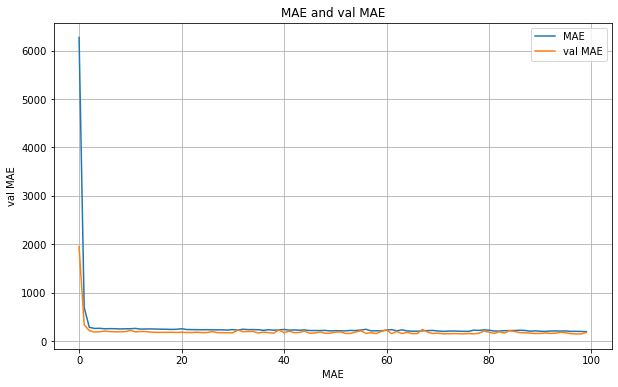

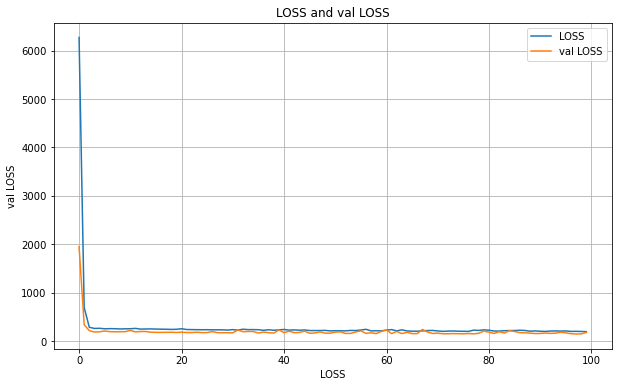

6/6 [==============================] - 0s 25ms/step


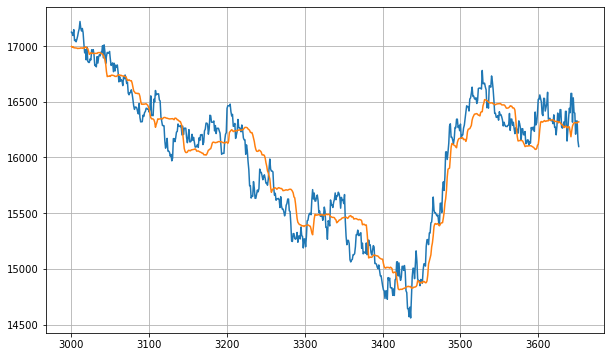

{'mae': 146.09114,
 'mse': 31752.885,
 'rmse': 178.19339,
 'mape': 0.9188468,
 'mase': 2.8229268}

In [17]:
# Load in best performing model
model_7 = tf.keras.models.load_model("model_experiments/modeld_7/")
model_7.evaluate(valid_set)

# Get mae and loss from history log
mae=history_7.history['mae']
val_mae=history_7.history['val_mae']
loss=history_7.history['loss']
val_loss=history_7.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_7 = model_forecast(model_7, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_7 = forecast_7.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_7))

eval_model_7 = evaluate_preds(y_true=x_valid,
                               y_pred=results_7)
eval_model_7

In [18]:
model_8 = tf.keras.models.Sequential([
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32), input_shape=[window_size, 1]),
  tf.keras.layers.Dense(1)
], name="model_8")

# Get initial weights
init_weights = model_8.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_8.set_weights(init_weights)

model_8.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_8.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_8 = model_8.fit(train_set,
                      epochs=20,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_8.name)])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               8704      
 l)                                                              
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
     23/Unknown - 6s 29ms/step - loss: 15702.8057 - mae: 15703.3057

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 24s 788ms/step - loss: 15705.7578 - mae: 15706.2588 - val_loss: 15956.7031 - val_mae: 15957.2041
Epoch 2/20
24/24 [==============================] - ETA: 0s - loss: 15705.5303 - mae: 15706.0293

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 746ms/step - loss: 15705.5303 - mae: 15706.0293 - val_loss: 15956.4766 - val_mae: 15956.9756
Epoch 3/20
22/24 [==========================>...] - ETA: 0s - loss: 15680.6279 - mae: 15681.1279

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 766ms/step - loss: 15705.3037 - mae: 15705.8037 - val_loss: 15956.2500 - val_mae: 15956.7510
Epoch 4/20
22/24 [==========================>...] - ETA: 0s - loss: 15677.3867 - mae: 15677.8867

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 753ms/step - loss: 15705.0762 - mae: 15705.5762 - val_loss: 15956.0244 - val_mae: 15956.5244
Epoch 5/20
23/24 [===========================>..] - ETA: 0s - loss: 15701.0234 - mae: 15701.5234

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 761ms/step - loss: 15704.8516 - mae: 15705.3506 - val_loss: 15955.7998 - val_mae: 15956.2988
Epoch 6/20
22/24 [==========================>...] - ETA: 0s - loss: 15672.5479 - mae: 15673.0479

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 753ms/step - loss: 15704.6279 - mae: 15705.1270 - val_loss: 15955.5742 - val_mae: 15956.0742
Epoch 7/20
23/24 [===========================>..] - ETA: 0s - loss: 15700.2598 - mae: 15700.7598

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 20s 853ms/step - loss: 15704.4023 - mae: 15704.9023 - val_loss: 15955.3516 - val_mae: 15955.8506
Epoch 8/20
23/24 [===========================>..] - ETA: 0s - loss: 15698.7256 - mae: 15699.2256

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 732ms/step - loss: 15704.1748 - mae: 15704.6748 - val_loss: 15955.1250 - val_mae: 15955.6240
Epoch 9/20
24/24 [==============================] - ETA: 0s - loss: 15703.9541 - mae: 15704.4541

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 16s 701ms/step - loss: 15703.9541 - mae: 15704.4541 - val_loss: 15954.9004 - val_mae: 15955.4014
Epoch 10/20
23/24 [===========================>..] - ETA: 0s - loss: 15697.4307 - mae: 15697.9307

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 736ms/step - loss: 15703.7295 - mae: 15704.2305 - val_loss: 15954.6777 - val_mae: 15955.1768
Epoch 11/20
23/24 [===========================>..] - ETA: 0s - loss: 15702.0010 - mae: 15702.5010

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 16s 690ms/step - loss: 15703.5039 - mae: 15704.0059 - val_loss: 15954.4531 - val_mae: 15954.9531
Epoch 12/20
23/24 [===========================>..] - ETA: 0s - loss: 15699.4434 - mae: 15699.9434

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 16s 694ms/step - loss: 15703.2822 - mae: 15703.7822 - val_loss: 15954.2275 - val_mae: 15954.7275
Epoch 13/20
23/24 [===========================>..] - ETA: 0s - loss: 15698.2119 - mae: 15698.7119

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 714ms/step - loss: 15703.0547 - mae: 15703.5547 - val_loss: 15954.0049 - val_mae: 15954.5059
Epoch 14/20
23/24 [===========================>..] - ETA: 0s - loss: 15699.2295 - mae: 15699.7295

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 17s 711ms/step - loss: 15702.8340 - mae: 15703.3330 - val_loss: 15953.7783 - val_mae: 15954.2793
Epoch 15/20
22/24 [==========================>...] - ETA: 0s - loss: 15675.7842 - mae: 15676.2842

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 788ms/step - loss: 15702.6045 - mae: 15703.1055 - val_loss: 15953.5557 - val_mae: 15954.0566
Epoch 16/20
23/24 [===========================>..] - ETA: 0s - loss: 15699.0215 - mae: 15699.5215

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 20s 875ms/step - loss: 15702.3838 - mae: 15702.8838 - val_loss: 15953.3311 - val_mae: 15953.8301
Epoch 17/20
23/24 [===========================>..] - ETA: 0s - loss: 15699.8447 - mae: 15700.3447

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 19s 801ms/step - loss: 15702.1611 - mae: 15702.6611 - val_loss: 15953.1074 - val_mae: 15953.6064
Epoch 18/20
22/24 [==========================>...] - ETA: 0s - loss: 15667.5410 - mae: 15668.0410

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 786ms/step - loss: 15701.9336 - mae: 15702.4336 - val_loss: 15952.8848 - val_mae: 15953.3838
Epoch 19/20
23/24 [===========================>..] - ETA: 0s - loss: 15696.6191 - mae: 15697.1191

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 19s 796ms/step - loss: 15701.7129 - mae: 15702.2129 - val_loss: 15952.6602 - val_mae: 15953.1592
Epoch 20/20
22/24 [==========================>...] - ETA: 0s - loss: 15671.8135 - mae: 15672.3135

INFO:tensorflow:Assets written to: model_experiments\model_8\assets


INFO:tensorflow:Assets written to: model_experiments\model_8\assets


24/24 [==============================] - 18s 759ms/step - loss: 15701.4854 - mae: 15701.9863 - val_loss: 15952.4346 - val_mae: 15952.9346


5/5 [==============================] - 1s 23ms/step - loss: 15952.4336 - mae: 15952.9346


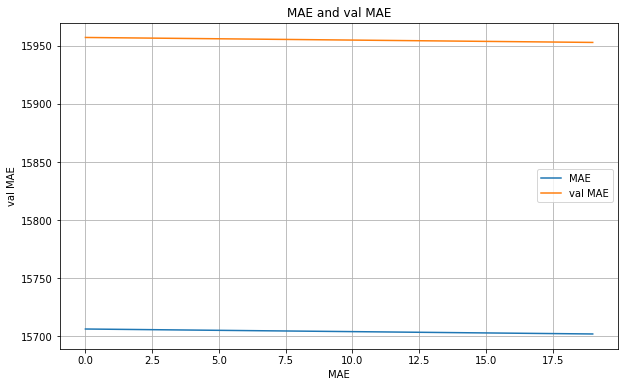

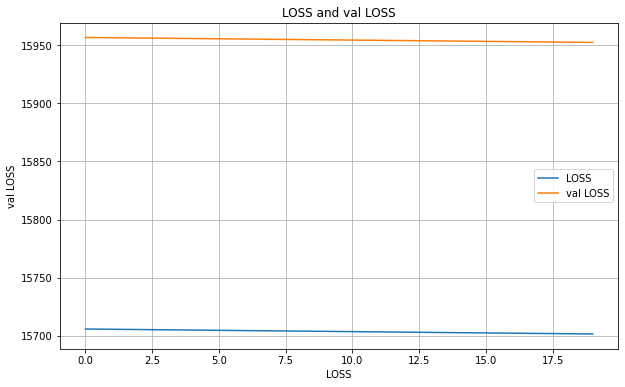

6/6 [==============================] - 1s 24ms/step


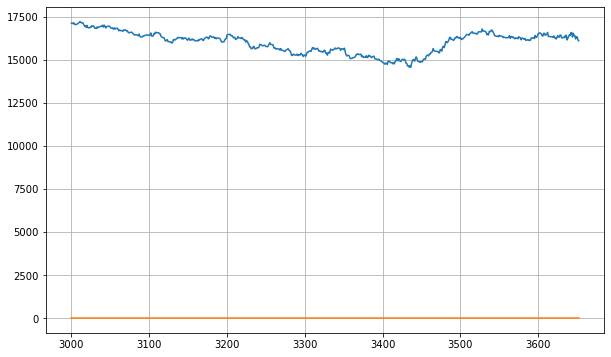

{'mae': 16002.092,
 'mse': 256439680.0,
 'rmse': 16013.734,
 'mape': 99.97682,
 'mase': 309.20926}

In [19]:
# Load in best performing model
model_8 = tf.keras.models.load_model("model_experiments/model_8/")
model_8.evaluate(valid_set)

# Get mae and loss from history log
mae=history_8.history['mae']
val_mae=history_8.history['val_mae']
loss=history_8.history['loss']
val_loss=history_8.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_8 = model_forecast(model_8, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_8 = forecast_8.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_8))

eval_model_8 = evaluate_predss(y_true=x_valid,
                               y_pred=results_8)
eval_model_8

In [20]:
model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                            strides=1,
                            activation="relu",
                            padding='causal',
                            input_shape=[window_size, 1]),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_9")

# Get initial weights
init_weights = model_9.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_9.set_weights(init_weights)

model_9.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_9.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_9 = model_9.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_9.name)])

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 128)           512       
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                           

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 3s 84ms/step - loss: 4031.9993 - mae: 4032.4993 - val_loss: 947.0811 - val_mae: 947.5811
Epoch 2/100
23/24 [===========================>..] - ETA: 0s - loss: 410.9807 - mae: 411.4804

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 71ms/step - loss: 409.0703 - mae: 409.5700 - val_loss: 253.9936 - val_mae: 254.4936
Epoch 3/100
23/24 [===========================>..] - ETA: 0s - loss: 262.5178 - mae: 263.0173

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 71ms/step - loss: 262.4163 - mae: 262.9158 - val_loss: 205.6130 - val_mae: 206.1127
Epoch 4/100
22/24 [==========================>...] - ETA: 0s - loss: 258.9711 - mae: 259.4710

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 257.4042 - mae: 257.9041 - val_loss: 201.6742 - val_mae: 202.1741
Epoch 5/100
21/24 [=========================>....] - ETA: 0s - loss: 253.8204 - mae: 254.3203

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 252.4617 - mae: 252.9615 - val_loss: 181.5531 - val_mae: 182.0524
Epoch 6/100
20/24 [========================>.....] - ETA: 0s - loss: 250.1829 - mae: 250.6825

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 249.2476 - mae: 249.7473 - val_loss: 181.2961 - val_mae: 181.7961
Epoch 7/100
24/24 [==============================] - 1s 23ms/step - loss: 245.2561 - mae: 245.7560 - val_loss: 190.3618 - val_mae: 190.8617
Epoch 8/100
24/24 [==============================] - 1s 24ms/step - loss: 242.8869 - mae: 243.3866 - val_loss: 213.0553 - val_mae: 213.5545
Epoch 9/100
24/24 [==============================] - 1s 24ms/step - loss: 242.2495 - mae: 242.7487 - val_loss: 189.4125 - val_mae: 189.9113
Epoch 10/100
24/24 [==============================] - 1s 26ms/step - loss: 250.7430 - mae: 251.2427 - val_loss: 197.1970 - val_mae: 197.6970
Epoch 11/100
24/24 [==============================] - 1s 25ms/step - loss: 259.5812 - mae: 260.0811 - val_loss: 190.4629 - val_mae: 190.9624
Epoch 12/100
24/24 [==============================] - 1s 24ms/step - loss: 238.7977 - mae: 239.2972 - val_loss: 186.5346 - val_mae: 187.0346
Epoch 13/100
23/24 [=========

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 89ms/step - loss: 249.7004 - mae: 250.2000 - val_loss: 177.3879 - val_mae: 177.8879
Epoch 14/100
24/24 [==============================] - 1s 23ms/step - loss: 239.9922 - mae: 240.4910 - val_loss: 187.1045 - val_mae: 187.6042
Epoch 15/100
24/24 [==============================] - 1s 24ms/step - loss: 245.5799 - mae: 246.0794 - val_loss: 178.3710 - val_mae: 178.8708
Epoch 16/100
24/24 [==============================] - 1s 24ms/step - loss: 258.3770 - mae: 258.8766 - val_loss: 273.2828 - val_mae: 273.7812
Epoch 17/100
21/24 [=========================>....] - ETA: 0s - loss: 259.7893 - mae: 260.2888

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 71ms/step - loss: 257.1381 - mae: 257.6376 - val_loss: 175.8325 - val_mae: 176.3325
Epoch 18/100
24/24 [==============================] - 1s 23ms/step - loss: 241.7392 - mae: 242.2387 - val_loss: 252.7735 - val_mae: 253.2732
Epoch 19/100
24/24 [==============================] - 1s 23ms/step - loss: 243.8595 - mae: 244.3591 - val_loss: 180.9763 - val_mae: 181.4758
Epoch 20/100
17/24 [====================>.........] - ETA: 0s - loss: 236.5930 - mae: 237.0922

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 232.7858 - mae: 233.2849 - val_loss: 174.3993 - val_mae: 174.8978
Epoch 21/100
24/24 [==============================] - 1s 24ms/step - loss: 230.3300 - mae: 230.8293 - val_loss: 175.8074 - val_mae: 176.3071
Epoch 22/100
24/24 [==============================] - 1s 24ms/step - loss: 230.9659 - mae: 231.4657 - val_loss: 188.6926 - val_mae: 189.1926
Epoch 23/100
24/24 [==============================] - 1s 23ms/step - loss: 230.2356 - mae: 230.7350 - val_loss: 180.7381 - val_mae: 181.2373
Epoch 24/100
24/24 [==============================] - 1s 24ms/step - loss: 235.0995 - mae: 235.5992 - val_loss: 183.8141 - val_mae: 184.3141
Epoch 25/100
24/24 [==============================] - 1s 25ms/step - loss: 227.6372 - mae: 228.1366 - val_loss: 186.7110 - val_mae: 187.2105
Epoch 26/100
24/24 [==============================] - 1s 23ms/step - loss: 226.2502 - mae: 226.7498 - val_loss: 195.9329 - val_mae: 196.4325
Epoch 27/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 245.1157 - mae: 245.6152 - val_loss: 163.4156 - val_mae: 163.9146
Epoch 30/100
24/24 [==============================] - 1s 24ms/step - loss: 224.8376 - mae: 225.3371 - val_loss: 187.7944 - val_mae: 188.2944
Epoch 31/100
24/24 [==============================] - 1s 24ms/step - loss: 220.4445 - mae: 220.9440 - val_loss: 168.2529 - val_mae: 168.7514
Epoch 32/100
24/24 [==============================] - 1s 23ms/step - loss: 220.9147 - mae: 221.4145 - val_loss: 168.3574 - val_mae: 168.8562
Epoch 33/100
24/24 [==============================] - 1s 23ms/step - loss: 224.7225 - mae: 225.2220 - val_loss: 167.4788 - val_mae: 167.9765
Epoch 34/100
24/24 [==============================] - 1s 23ms/step - loss: 218.6090 - mae: 219.1082 - val_loss: 169.3067 - val_mae: 169.8063
Epoch 35/100
24/24 [==============================] - 1s 24ms/step - loss: 222.3908 - mae: 222.8903 - val_loss: 171.5338 - val_mae: 172.0323
Epoch 36/100
21/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 214.9854 - mae: 215.4844 - val_loss: 159.0483 - val_mae: 159.5477
Epoch 37/100
24/24 [==============================] - 1s 24ms/step - loss: 224.9583 - mae: 225.4577 - val_loss: 159.7480 - val_mae: 160.2480
Epoch 38/100
24/24 [==============================] - 1s 24ms/step - loss: 215.0862 - mae: 215.5856 - val_loss: 161.0305 - val_mae: 161.5299
Epoch 39/100
24/24 [==============================] - 1s 24ms/step - loss: 218.2408 - mae: 218.7404 - val_loss: 209.2095 - val_mae: 209.7081
Epoch 40/100
24/24 [==============================] - 1s 45ms/step - loss: 232.2628 - mae: 232.7623 - val_loss: 298.0320 - val_mae: 298.5320
Epoch 41/100
19/24 [======================>.......] - ETA: 0s - loss: 235.1834 - mae: 235.6828

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 72ms/step - loss: 229.3773 - mae: 229.8766 - val_loss: 155.7437 - val_mae: 156.2437
Epoch 42/100
24/24 [==============================] - 1s 23ms/step - loss: 206.9151 - mae: 207.4147 - val_loss: 245.4652 - val_mae: 245.9648
Epoch 43/100
24/24 [==============================] - 10799s 470s/step - loss: 232.3475 - mae: 232.8470 - val_loss: 243.7479 - val_mae: 244.2479
Epoch 44/100
24/24 [==============================] - 2s 66ms/step - loss: 230.7912 - mae: 231.2907 - val_loss: 182.4478 - val_mae: 182.9462
Epoch 45/100
24/24 [==============================] - 1s 40ms/step - loss: 210.5572 - mae: 211.0569 - val_loss: 175.9365 - val_mae: 176.4365
Epoch 46/100
24/24 [==============================] - 1s 35ms/step - loss: 216.9700 - mae: 217.4696 - val_loss: 255.7450 - val_mae: 256.2450
Epoch 47/100
24/24 [==============================] - 4017s 175s/step - loss: 218.0574 - mae: 218.5571 - val_loss: 156.2393 - val_mae: 156.7390
Epoch 48/100
24/24 

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 5s 214ms/step - loss: 204.7677 - mae: 205.2673 - val_loss: 151.7275 - val_mae: 152.2270
Epoch 52/100
24/24 [==============================] - 2s 51ms/step - loss: 208.1256 - mae: 208.6251 - val_loss: 192.9407 - val_mae: 193.4406
Epoch 53/100
24/24 [==============================] - 1s 42ms/step - loss: 206.2924 - mae: 206.7919 - val_loss: 154.0599 - val_mae: 154.5586
Epoch 54/100
24/24 [==============================] - 2s 52ms/step - loss: 209.0463 - mae: 209.5456 - val_loss: 152.6739 - val_mae: 153.1738
Epoch 55/100
24/24 [==============================] - 1s 36ms/step - loss: 221.1031 - mae: 221.6027 - val_loss: 152.1909 - val_mae: 152.6909
Epoch 56/100
24/24 [==============================] - 1s 34ms/step - loss: 213.5864 - mae: 214.0860 - val_loss: 158.5409 - val_mae: 159.0409
Epoch 57/100
24/24 [==============================] - 1s 35ms/step - loss: 202.9115 - mae: 203.4113 - val_loss: 157.6241 - val_mae: 158.1224
Epoch 58/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 4s 154ms/step - loss: 206.3975 - mae: 206.8971 - val_loss: 147.4646 - val_mae: 147.9642
Epoch 63/100
24/24 [==============================] - 1s 40ms/step - loss: 211.2669 - mae: 211.7666 - val_loss: 153.6270 - val_mae: 154.1261
Epoch 64/100
24/24 [==============================] - 1s 41ms/step - loss: 210.1854 - mae: 210.6850 - val_loss: 191.4460 - val_mae: 191.9460
Epoch 65/100
24/24 [==============================] - 1s 36ms/step - loss: 206.8388 - mae: 207.3380 - val_loss: 223.4649 - val_mae: 223.9647
Epoch 66/100
24/24 [==============================] - 1s 34ms/step - loss: 223.9520 - mae: 224.4512 - val_loss: 155.8736 - val_mae: 156.3734
Epoch 67/100
24/24 [==============================] - 1s 32ms/step - loss: 235.2439 - mae: 235.7434 - val_loss: 176.2414 - val_mae: 176.7404
Epoch 68/100
24/24 [==============================] - 1s 36ms/step - loss: 211.1325 - mae: 211.6319 - val_loss: 186.9557 - val_mae: 187.4547
Epoch 69/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 88ms/step - loss: 208.9986 - mae: 209.4980 - val_loss: 146.8066 - val_mae: 147.3063
Epoch 80/100
24/24 [==============================] - 1s 28ms/step - loss: 202.0878 - mae: 202.5875 - val_loss: 155.5459 - val_mae: 156.0459
Epoch 81/100
24/24 [==============================] - 1s 31ms/step - loss: 200.5812 - mae: 201.0801 - val_loss: 147.8165 - val_mae: 148.3155
Epoch 82/100
24/24 [==============================] - 1s 28ms/step - loss: 241.2583 - mae: 241.7578 - val_loss: 200.4488 - val_mae: 200.9475
Epoch 83/100
24/24 [==============================] - 1s 30ms/step - loss: 217.5713 - mae: 218.0704 - val_loss: 167.5848 - val_mae: 168.0844
Epoch 84/100
24/24 [==============================] - 1s 27ms/step - loss: 211.5610 - mae: 212.0606 - val_loss: 182.4280 - val_mae: 182.9273
Epoch 85/100
24/24 [==============================] - 1s 28ms/step - loss: 201.2425 - mae: 201.7421 - val_loss: 168.0783 - val_mae: 168.5775
Epoch 86/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 3s 113ms/step - loss: 202.4200 - mae: 202.9195 - val_loss: 146.3743 - val_mae: 146.8736
Epoch 89/100
24/24 [==============================] - 1s 28ms/step - loss: 201.9462 - mae: 202.4458 - val_loss: 162.7512 - val_mae: 163.2506
Epoch 90/100
24/24 [==============================] - 1s 26ms/step - loss: 201.0193 - mae: 201.5186 - val_loss: 146.8018 - val_mae: 147.3017
Epoch 91/100
24/24 [==============================] - 1s 25ms/step - loss: 226.6508 - mae: 227.1502 - val_loss: 166.1993 - val_mae: 166.6993
Epoch 92/100
24/24 [==============================] - 1s 26ms/step - loss: 214.0205 - mae: 214.5199 - val_loss: 188.0892 - val_mae: 188.5889
Epoch 93/100
24/24 [==============================] - 1s 28ms/step - loss: 198.6225 - mae: 199.1215 - val_loss: 147.1111 - val_mae: 147.6109
Epoch 94/100
24/24 [==============================] - 1s 28ms/step - loss: 197.4711 - mae: 197.9700 - val_loss: 147.8315 - val_mae: 148.3309
Epoch 95/100
24/24 [=====

INFO:tensorflow:Assets written to: model_experiments\model_9\assets


INFO:tensorflow:Assets written to: model_experiments\model_9\assets


24/24 [==============================] - 2s 81ms/step - loss: 198.6791 - mae: 199.1785 - val_loss: 145.9885 - val_mae: 146.4885
Epoch 98/100
24/24 [==============================] - 1s 35ms/step - loss: 197.1320 - mae: 197.6316 - val_loss: 150.0932 - val_mae: 150.5931
Epoch 99/100
24/24 [==============================] - 1s 26ms/step - loss: 207.8338 - mae: 208.3334 - val_loss: 207.1580 - val_mae: 207.6572
Epoch 100/100
24/24 [==============================] - 1s 28ms/step - loss: 246.5873 - mae: 247.0866 - val_loss: 209.2968 - val_mae: 209.7961


5/5 [==============================] - 0s 16ms/step - loss: 145.9885 - mae: 146.4885


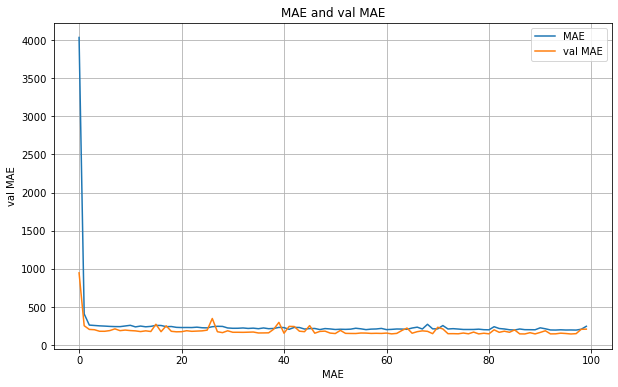

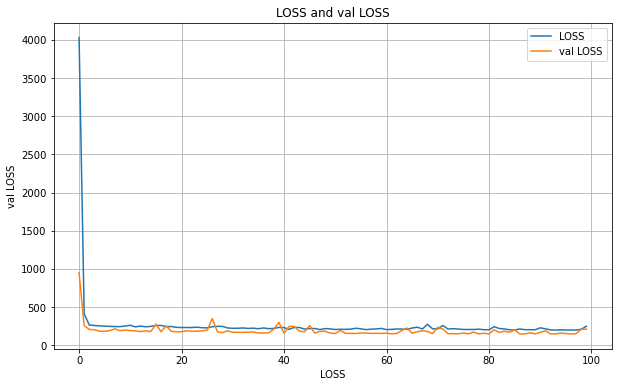

6/6 [==============================] - 0s 22ms/step


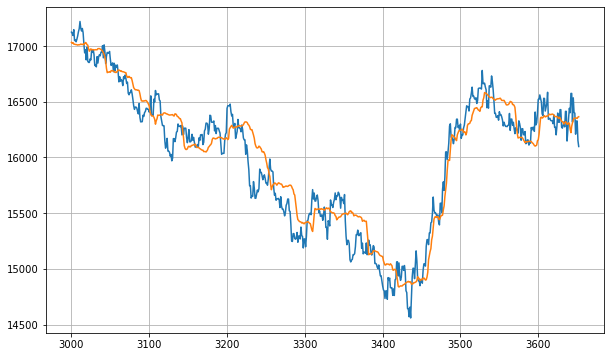

{'mae': 143.63422,
 'mse': 31468.615,
 'rmse': 177.39395,
 'mape': 0.90537834,
 'mase': 2.7754514}

In [21]:
# Load in best performing model
model_9 = tf.keras.models.load_model("model_experiments/model_9/")
model_9.evaluate(valid_set)

# Get mae and loss from history log
mae=history_9.history['mae']
val_mae=history_9.history['val_mae']
loss=history_9.history['loss']
val_loss=history_9.history['val_loss']

# Get number of epochs
epochs=range(len(loss)) 

# Plot mae and loss
plot_series(
    x=epochs, 
    y=(mae, val_mae), 
    title='MAE and val MAE', 
    xlabel='MAE',
    ylabel='val MAE',
    legend=['MAE', 'val MAE']
    )

plot_series(
    x=epochs, 
    y=(loss, val_loss), 
    title='LOSS and val LOSS', 
    xlabel='LOSS',
    ylabel='val LOSS',
    legend=['LOSS', 'val LOSS']
    )

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast_9 = model_forecast(model_9, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_9 = forecast_9.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_9))

eval_model_9 = evaluate_predss(y_true=x_valid,
                               y_pred=results_9)
eval_model_9

In [22]:
import pandas as pd
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"model_1_dense30,10,1": eval_model_1,
                              "model_2_dense128,32,1": eval_model_2,
                              "model_3_dense10,1": eval_model_3,
                              "model_4_dense32,32,10,1": eval_model_4,
                              "model_5_dense32,32,10,7": eval_model_5,
                              "model_6_conv1D64_globalmaxpooling1D_dense1": eval_model_6,
                              "model_7_conv1D512_globalmaxpooling1D_dense1":eval_model_7,
                              "model_8_bidirectionalLSTM32_dense1": eval_model_8,
                              "model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1": eval_model_9}).T
model_results

,mae,mse,rmse,mape,mase
"model_1_dense30,10,1",89.526115,1.322657e+04,115.006805,0.563800,1.729918
"model_2_dense128,32,1",77.263420,9.825188e+03,99.122086,0.485705,1.492965
"model_3_dense10,1",151.559052,3.924014e+04,198.091248,0.952955,2.928583
"model_4_dense32,32,10,1",99.681595,1.679733e+04,129.604507,0.626958,1.926153
"model_5_dense32,32,10,7",88.661392,1.294659e+04,88.661835,0.558086,1.713209
model_6_conv1D64_globalmaxpooling1D_dense1,155.384705,3.681301e+04,191.867157,0.979068,3.002507
model_7_conv1D512_globalmaxpooling1D_dense1,146.091141,3.175288e+04,178.193390,0.918847,2.822927
model_8_bidirectionalLSTM32_dense1,16002.091797,2.564397e+08,16013.734375,99.976822,309.209259
"model_9_conv1D128_globalmaxpooling1D_dense32,32,10,1",143.634216,3.146862e+04,177.393951,0.905378,2.775451


In [27]:
into_future = 30
future_forecast = make_future_forecast(values=series,
                                       model=model_1,
                                       into_future=into_future,
                                       window_size=window_size)

next_time_steps = np.arange(time[-1] + 1, time[-1] + 1 + into_future)
next_time_steps

# Insert last timestep/final price into next time steps and future forecasts so the plot connects
next_time_steps = np.insert(next_time_steps, 0, time[-1])
future_forecast = np.insert(future_forecast, 0, series[-1])


1/1 [==============================] - 0s 139ms/step


In [28]:
future_forecast

array([16098.5   , 16337.051 , 16311.051 , 16356.915 , 16384.932 ,
       16377.352 , 16308.593 , 16328.832 , 16335.68  , 16300.967 ,
       16252.292 , 16288.068 , 16287.142 , 16262.699 , 16287.125 ,
       16320.278 , 16326.61  , 16291.321 , 16382.172 , 16360.    ,
       16305.893 , 16322.775 , 16347.447 , 16328.538 , 16301.103 ,
       16311.313 , 16340.683 , 16311.231 , 16316.646 , 16347.6045,
       16341.79  ], dtype=float32)

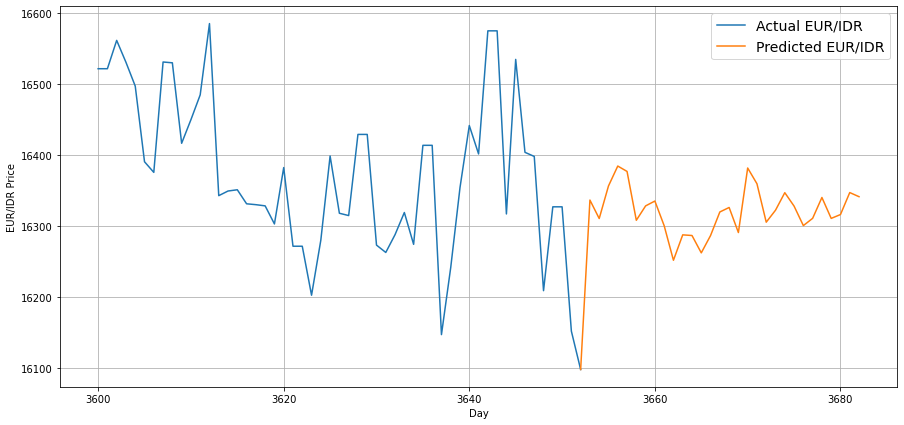

In [30]:
plt.figure(figsize=(15,7))
plot_time_series(time, series, start=3600, format="-", label="Actual EUR/IDR")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted EUR/IDR")